# Importing Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
import feature_engine.transformation as vt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures)    

# Pipeline
from sklearn.pipeline import Pipeline

# Statistics
# import probscale
from statsmodels.graphics.gofplots import qqplot

# Importing Dataset

In [2]:
df = pd.read_csv('abrasion_gmu2.csv')

In [3]:
df = df[df['GMU'] == 'GMU4']

In [4]:
df.describe().round(2).T

count     mean     std      min      25%      50%  \
midx                 330.0  2760.14  790.79  1361.73  1987.84  2783.20   
midy                 330.0  3869.99  217.34  3200.18  3761.28  3882.70   
midz                 330.0  4215.14  141.57  3915.02  4101.31  4217.90   
East                 330.0  2760.14  790.79  1361.73  1987.84  2783.20   
North                330.0  3869.99  217.34  3200.18  3761.28  3882.70   
elevation            330.0  4215.14  141.57  3915.02  4101.31  4217.90   
Chalcocite-Digenite  330.0     0.35    0.25     0.00     0.15     0.30   
Covellite            330.0     0.04    0.03     0.00     0.02     0.03   
Chalcopyrite         330.0     0.91    0.47     0.05     0.56     0.83   
Bornite              330.0     0.17    0.18     0.00     0.05     0.11   
Pyrite               330.0     0.76    0.86     0.00     0.10     0.48   
Enargite             330.0     0.00    0.00     0.00     0.00     0.00   
Sphalerite           330.0     0.01    0.00     0.01     0.01     0.01   
Quartz               330.0    30.18    6.61    17.28    26.45    28.96   
K-Feldspar           330.0    11.32    5.43     0.96     6.73    10.83   
Albite               330.0    25.44    7.57     5.23    20.04    25.26   
Muscovite/Sericite   330.0     7.36    5.19     0.72     3.42     6.12   
Clays                330.0     0.82    0.48     0.10     0.47     0.69   
Biotite              330.0     5.44    2.36     0.12     3.95     5.44   
Chlorite             330.0     1.51    0.74     0.05     0.92     1.46   
Calcite              330.0     0.02    0.04     0.00     0.00     0.01   
Gypsum/Anhydrite     330.0     0.13    0.48     0.01     0.02     0.04   
SG                   324.0     2.58    0.04     2.45     2.55     2.57   
Ai                   330.0     0.25    0.04     0.12     0.22     0.25   

                         75%      max  
midx                 3489.22  4177.91  
midy                 4002.12  4390.56  
midz                 4314.90  4514.34  
East                 3489.22  4177.91  
North                4002.12  4390.56  
elevation            4314.90  4514.34  
Chalcocite-Digenite     0.49     1.26  
Covellite               0.05     0.21  
Chalcopyrite            1.21     3.28  
Bornite                 0.21     1.06  
Pyrite                  1.14     4.38  
Enargite                0.00     0.01  
Sphalerite              0.01     0.01  
Quartz                 33.18    72.81  
K-Feldspar             15.15    29.60  
Albite                 30.24    50.44  
Muscovite/Sericite     10.06    25.27  
Clays                   1.07     3.01  
Biotite                 6.82    16.69  
Chlorite                2.01     4.73  
Calcite                 0.02     0.41  
Gypsum/Anhydrite        0.07     5.78  
SG                      2.60     2.79  
Ai                      0.28     0.37

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 165 to 494
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample               330 non-null    object 
 1   midx                 330 non-null    float64
 2   midy                 330 non-null    float64
 3   midz                 330 non-null    float64
 4   East                 330 non-null    float64
 5   North                330 non-null    float64
 6   elevation            330 non-null    float64
 7   Chalcocite-Digenite  330 non-null    float64
 8   Covellite            330 non-null    float64
 9   Chalcopyrite         330 non-null    float64
 10  Bornite              330 non-null    float64
 11  Pyrite               330 non-null    float64
 12  Enargite             330 non-null    float64
 13  Sphalerite           330 non-null    float64
 14  Quartz               330 non-null    float64
 15  K-Feldspar           330 non-null    f

# Feature engineering

## Missing data

In [6]:
df.isnull()

Sample   midx   midy   midz   East  North  elevation  \
165   False  False  False  False  False  False      False   
166   False  False  False  False  False  False      False   
167   False  False  False  False  False  False      False   
168   False  False  False  False  False  False      False   
169   False  False  False  False  False  False      False   
..      ...    ...    ...    ...    ...    ...        ...   
490   False  False  False  False  False  False      False   
491   False  False  False  False  False  False      False   
492   False  False  False  False  False  False      False   
493   False  False  False  False  False  False      False   
494   False  False  False  False  False  False      False   

     Chalcocite-Digenite  Covellite  Chalcopyrite  ...  Biotite  Chlorite  \
165                False      False         False  ...    False     False   
166                False      False         False  ...    False     False   
167                False      False         False  ...    False     False   
168                False      False         False  ...    False     False   
169                False      False         False  ...    False     False   
..                   ...        ...           ...  ...      ...       ...   
490                False      False         False  ...    False     False   
491                False      False         False  ...    False     False   
492                False      False         False  ...    False     False   
493                False      False         False  ...    False     False   
494                False      False         False  ...    False     False   

     Calcite  Gypsum/Anhydrite     SG  lithology  minzone  alteration     Ai  \
165    False             False  False      False    False       False  False   
166    False             False  False      False    False       False  False   
167    False             False  False      False    False       False  False   
168    False             False  False      False    False       False  False   
169    False             False  False      False    False       False  False   
..       ...               ...    ...        ...      ...         ...    ...   
490    False             False  False      False    False       False  False   
491    False             False  False      False    False       False  False   
492    False             False  False      False    False       False  False   
493    False             False  False      False    False       False  False   
494    False             False  False      False    False       False  False   

       GMU  
165  False  
166  False  
167  False  
168  False  
169  False  
..     ...  
490  False  
491  False  
492  False  
493  False  
494  False  

[330 rows x 29 columns]

In [7]:
is_null_sum = df.isnull().sum()
is_null_sum

Sample                 0
midx                   0
midy                   0
midz                   0
East                   0
North                  0
elevation              0
Chalcocite-Digenite    0
Covellite              0
Chalcopyrite           0
Bornite                0
Pyrite                 0
Enargite               0
Sphalerite             0
Quartz                 0
K-Feldspar             0
Albite                 0
Muscovite/Sericite     0
Clays                  0
Biotite                0
Chlorite               0
Calcite                0
Gypsum/Anhydrite       0
SG                     6
lithology              0
minzone                0
alteration             0
Ai                     0
GMU                    0
dtype: int64

**Note:**
In general, it is recommended to impute instead remove a feature when null ratio is less than 0.3.
Then, for SG will proceed to impute.

**Comment:**
Since there are missing values in the database, it is necessary to preprocess these values.

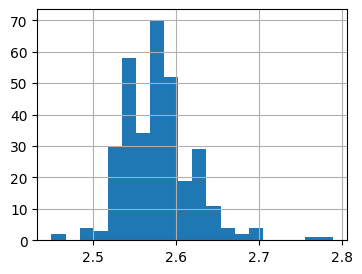

In [8]:
# SG distribution
df['SG'].hist(bins=20, figsize=(4,3));

**Comment:**
SG showing right-skewed distribution. Then, median instead mean will be imputed. 

### Median imputation

**Important note**:
    is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment (https://en.wikipedia.org/wiki/Leakage_(machine_learning)

In [9]:
# Separating dataset into train and test set (avoiding data leak)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Ai','Sample','GMU'], axis=1),
                                                           df['Ai'],
                                                           test_size=0.2,
                                                           random_state=1)
X_train.shape, X_test.shape

((264, 26), (66, 26))

In [10]:
# To perform median imputation, specify imputation strategy
imputer = MeanMedianImputer(
                imputation_method='median',
                variables=['SG'])

In [11]:
# Fitting the imputer
imputer.fit(X_train)

MeanMedianImputer(variables=['SG'])

In [12]:
# The imputer found the numerical variables to impute with the median
imputer.imputer_dict_

{'SG': 2.57}

In [13]:
# X_train has not been transformed yet
X_train['SG'].isnull().sum()

3

In [14]:
# Saving pre transformed X_train
X_train_pre = X_train['SG'] 

In [15]:
# transforming X_train. In this case, imputing the median to the dataset
X_train = imputer.transform(X_train)

In [16]:
#  Counting null after transformation. If zero, this is correct
X_train['SG'].isnull().sum()

0

In [17]:
# Saving pre transformed X_train
X_train_post = X_train['SG'] 

In [18]:
# Same processing por X_test
X_test['SG'].isnull().sum()

3

In [19]:
X_test = imputer.transform(X_test)

In [20]:
X_test['SG'].isnull().sum()

0

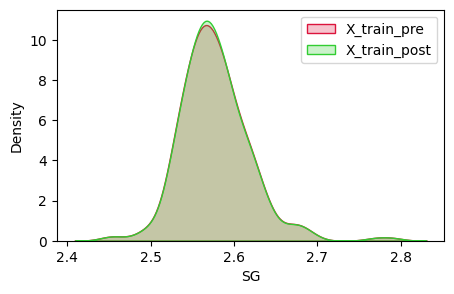

In [21]:
# Effect of median imputation on SG distribution

fig,ax = plt.subplots(figsize=(5,3))

# Original variable distribution
sns.kdeplot(data=X_train_pre, color='crimson', fill=True, label='X_train_pre')

# Original variable distribution
sns.kdeplot(data=X_train_post, color='limegreen', fill=True, label='X_train_post')

plt.legend();

**Comment:**
Distortion of original variable distribution, especially if the fraction of missing values is large. It will also produce distortion of the variance and the covariance with other variables of the dataset. In this particular case, distortion is limited.

## Baseline model

In [22]:
# Generating databases with only numerical features
X_train_num = X_train.select_dtypes(exclude=['object'])
X_test_num = X_test.select_dtypes(exclude=['object'])

### Linear regression model

In [23]:
# Instatiating linear regression model
lr = LinearRegression()

In [24]:
# Adjusting linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares
lr.fit(X_train_num, y_train)

LinearRegression()

In [25]:
# Prediction of Ai for testing dataset
y_pred_lr = lr.predict(X_test_num)

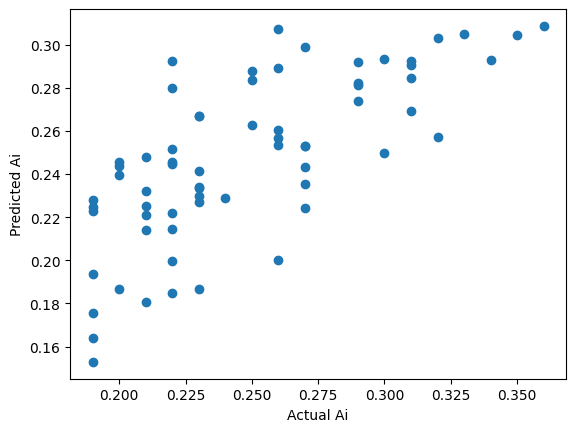

In [26]:
# Predicted vs actual value visualization
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Ai')
plt.ylabel('Predicted Ai');

In [27]:
print("Model results:")
print("")

mse_test = mean_squared_error(y_test, y_pred_lr)
r2_test = r2_score(y_test, y_pred_lr)

print("RMSE test:", round(np.sqrt(mse_test),3))
print("R2 test:", round((r2_test),3))

Model results:

RMSE test: 0.031
R2 test: 0.503


## Categorical variables

In [28]:
# Revision of categorical features in the dataset
cat_var = df.select_dtypes(include=['object'])

In [29]:
cat_var

Sample lithology minzone alteration   GMU
165  S-166  porphyry     SSF        POT  GMU4
166  S-167  porphyry     SSF        POT  GMU4
167  S-168  porphyry     SSF        POT  GMU4
168  S-169  porphyry     SSF        POT  GMU4
169  S-170  porphyry     SSF        POT  GMU4
..     ...       ...     ...        ...   ...
490  S-494  porphyry     SSF        POT  GMU4
491  S-495  porphyry     SSF        POT  GMU4
492  S-496  porphyry     SSF        POT  GMU4
493  S-497  porphyry     SSF        POT  GMU4
494  S-498  porphyry     SSF        POT  GMU4

[330 rows x 5 columns]

**Comment:**
Since there are categorical variables in the database, it is necessary to preprocess these values.

### Categorical variables One Hot Encoding (OHE)

In [30]:
cat_var.columns

Index(['Sample', 'lithology', 'minzone', 'alteration', 'GMU'], dtype='object')

In [31]:
# Intanstiating OHE
ohe = fe_OneHotEncoder(
        top_categories=None,
        variables=['lithology', 'minzone', 'alteration'],
        drop_last=False)

In [32]:
# Fitting OHE
ohe.fit(X_train)

OneHotEncoder(variables=['lithology', 'minzone', 'alteration'])

In [33]:
# Train set transformation
X_train = ohe.transform(X_train)

In [34]:
# Test set transformation
X_test = ohe.transform(X_test)

In [35]:
X_train.head()

midx     midy     midz     East    North  elevation  \
356  3277.84  3498.62  4157.19  3277.84  3498.62    4157.19   
460  1681.61  4186.48  4239.82  1681.61  4186.48    4239.82   
327  3417.49  3385.05  4219.50  3417.49  3385.05    4219.50   
340  3353.68  3378.18  4216.77  3353.68  3378.18    4216.77   
326  3417.49  3385.05  4219.50  3417.49  3385.05    4219.50   

     Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
356             0.020000       0.01          1.53  0.120000  ...   
460             0.732994       0.02          0.77  0.072527  ...   
327             0.000000       0.00          1.33  0.000000  ...   
340             0.010000       0.00          1.84  0.010000  ...   
326             0.000000       0.00          1.61  0.010000  ...   

     Muscovite/Sericite  Clays  Biotite  Chlorite  Calcite  Gypsum/Anhydrite  \
356                6.28   0.45     5.87      1.91     0.01              0.07   
460                4.14   0.27     8.06      1.20     0.01              0.02   
327               11.93   0.29     3.58      1.73     0.24              5.78   
340                9.98   0.28     4.39      1.77     0.00              0.02   
326               12.24   0.27     3.13      1.59     0.22              5.09   

       SG  lithology_porphyry  minzone_SSF  alteration_POT  
356  2.60                   1            1               1  
460  2.53                   1            1               1  
327  2.68                   1            1               1  
340  2.58                   1            1               1  
326  2.67                   1            1               1  

[5 rows x 26 columns]

## Variable distribution and outliers

In [36]:
num_var = df.select_dtypes(exclude='object')

In [37]:
num_var.columns

Index(['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG', 'Ai'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_8\1506006648.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3, figsize = (15,5))


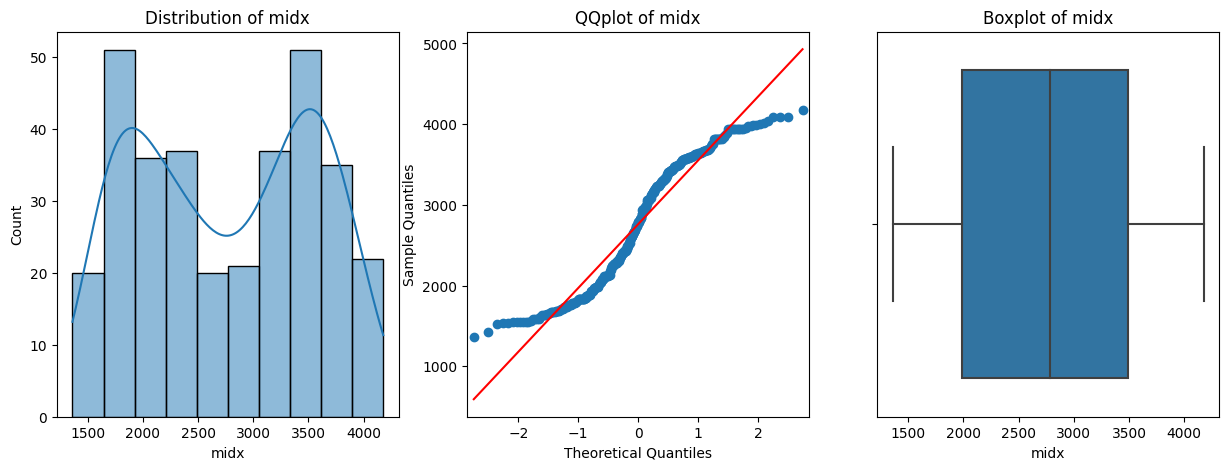

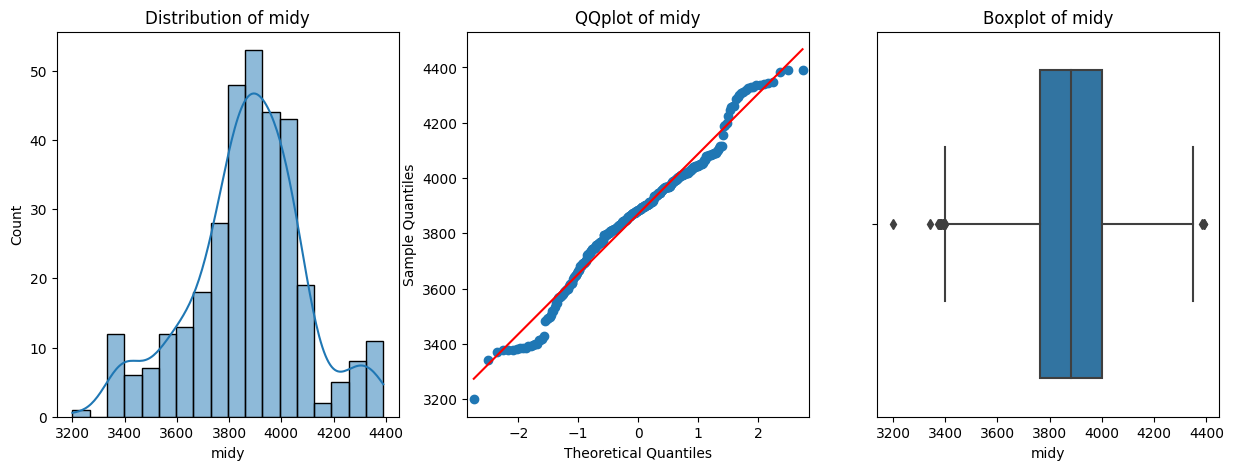

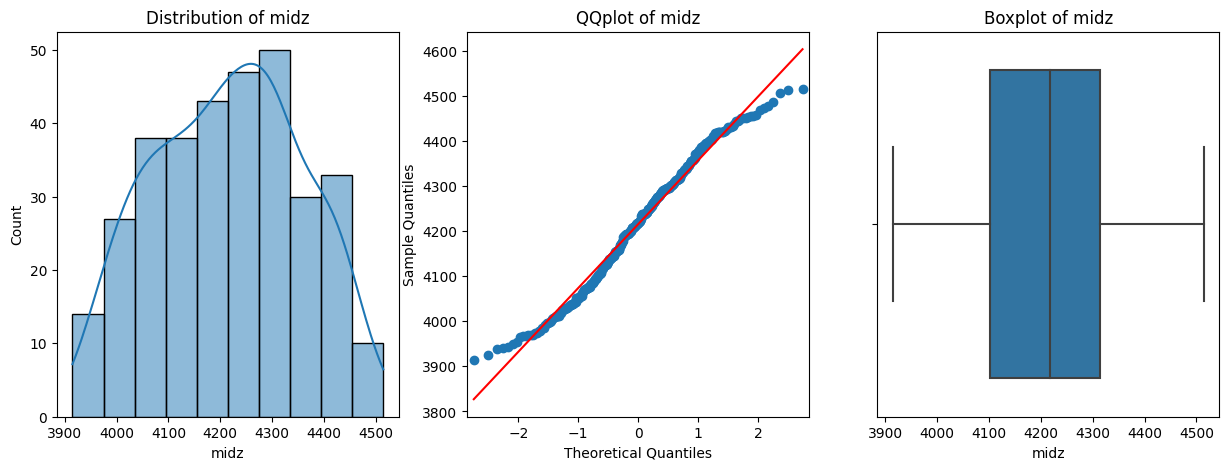

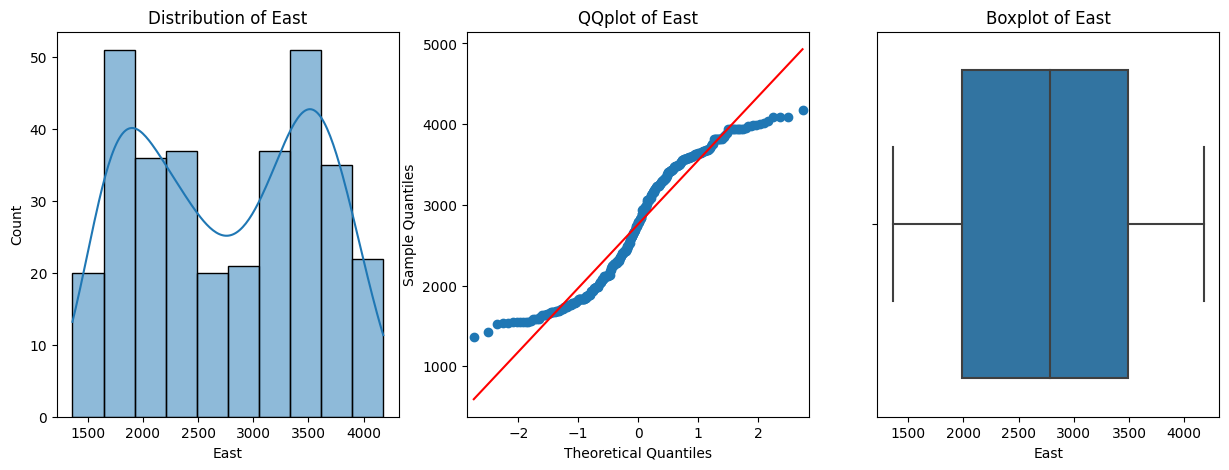

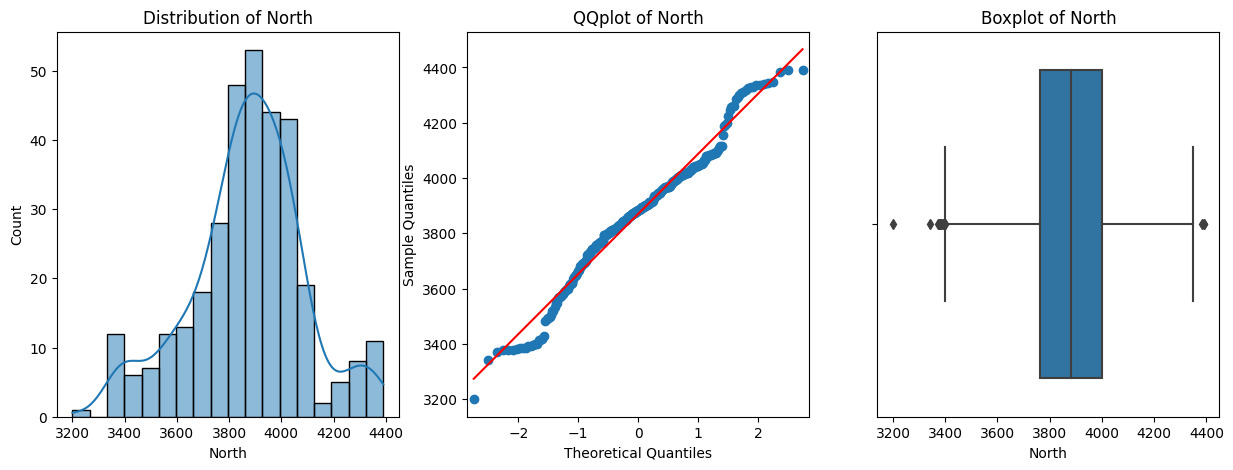

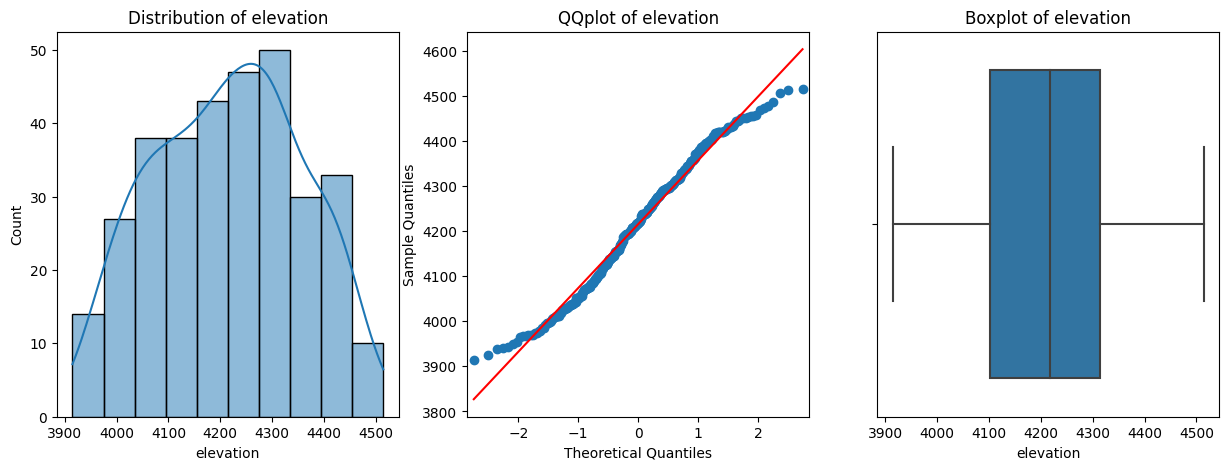

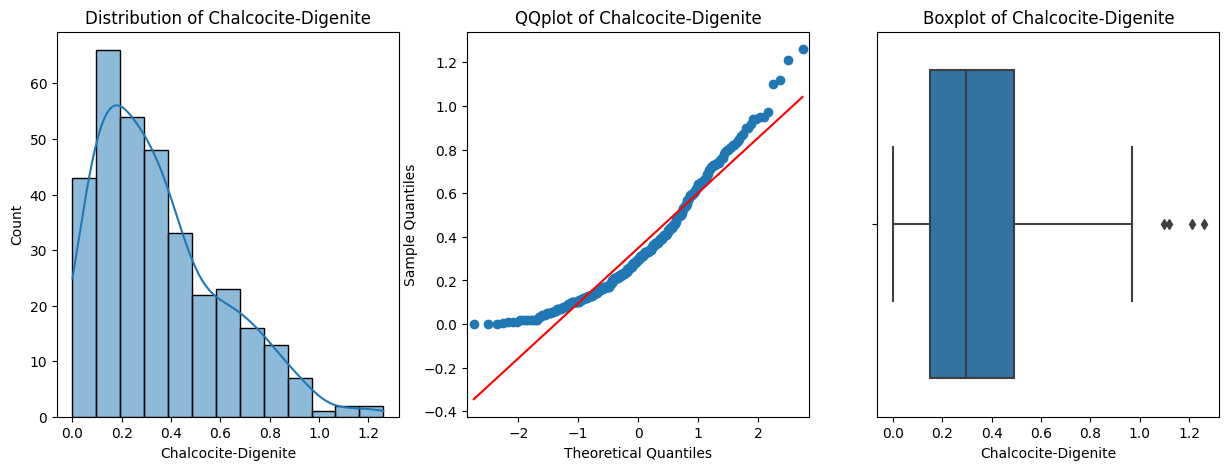

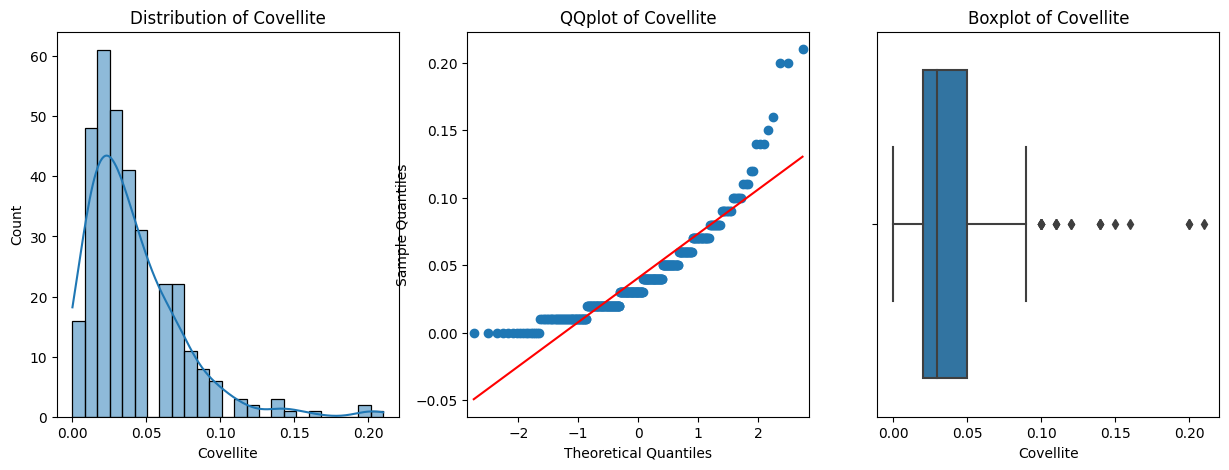

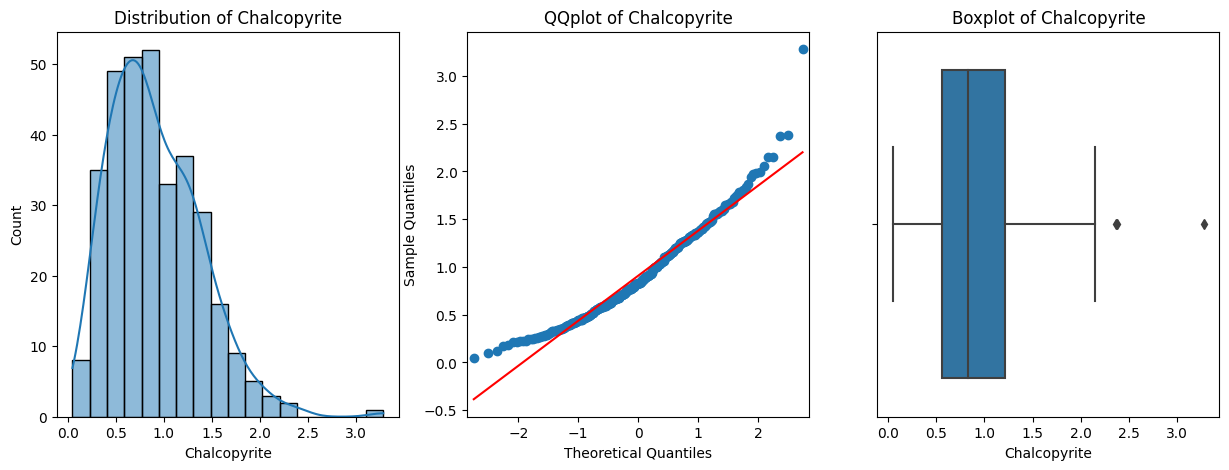

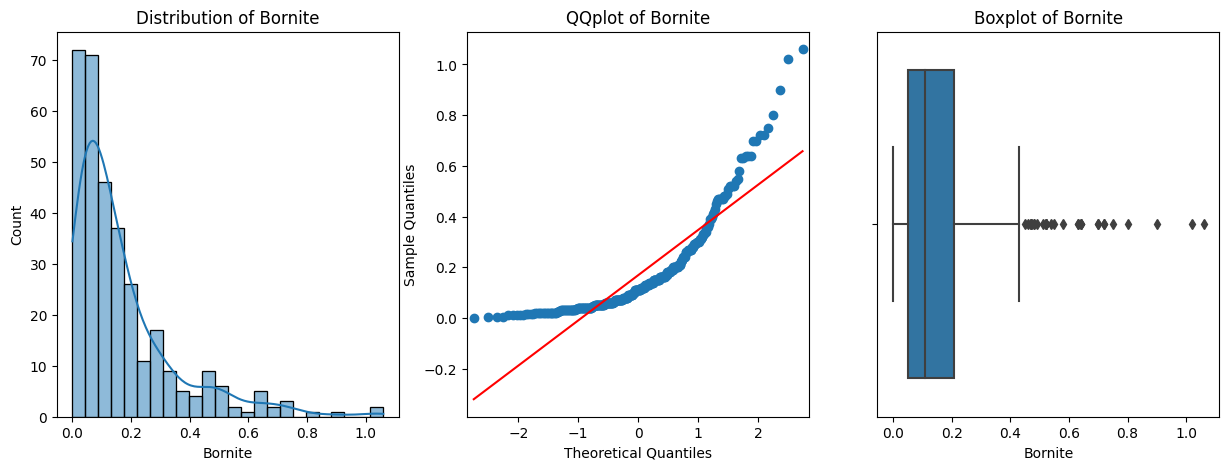

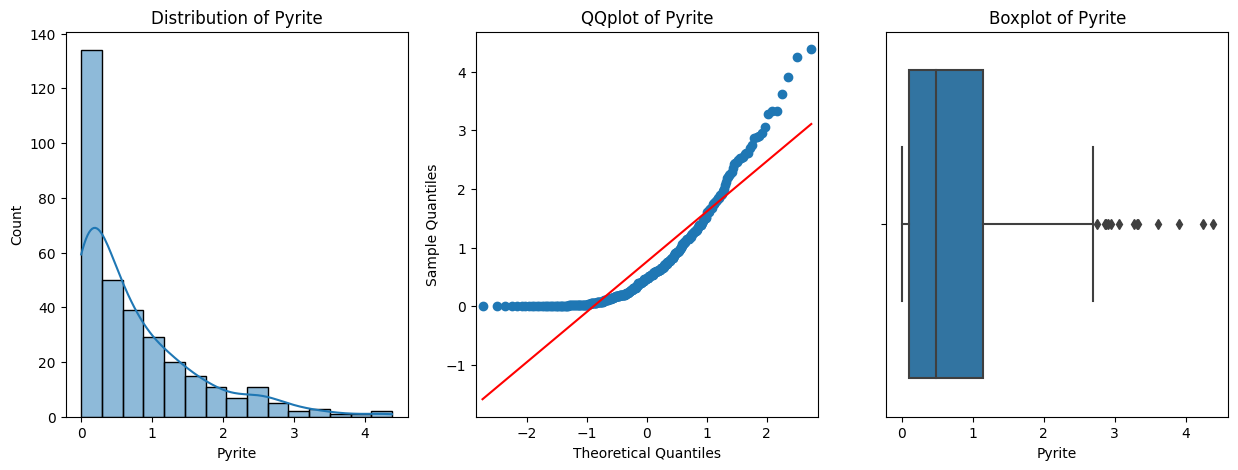

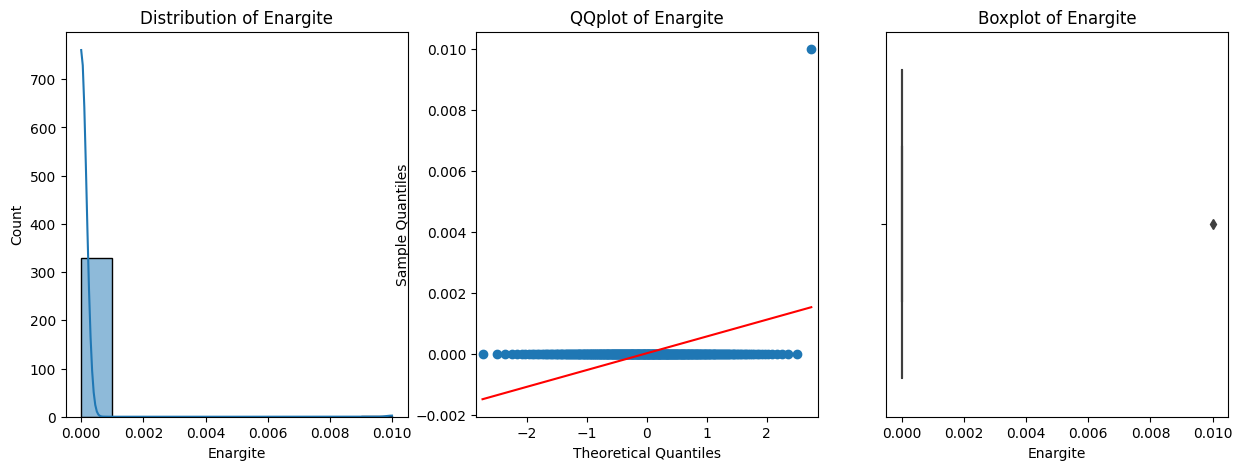

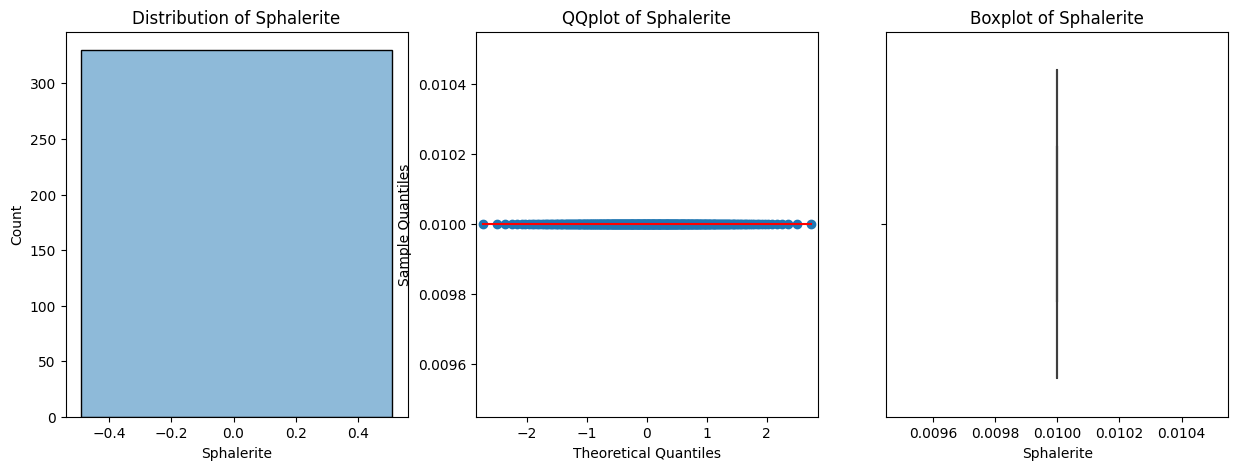

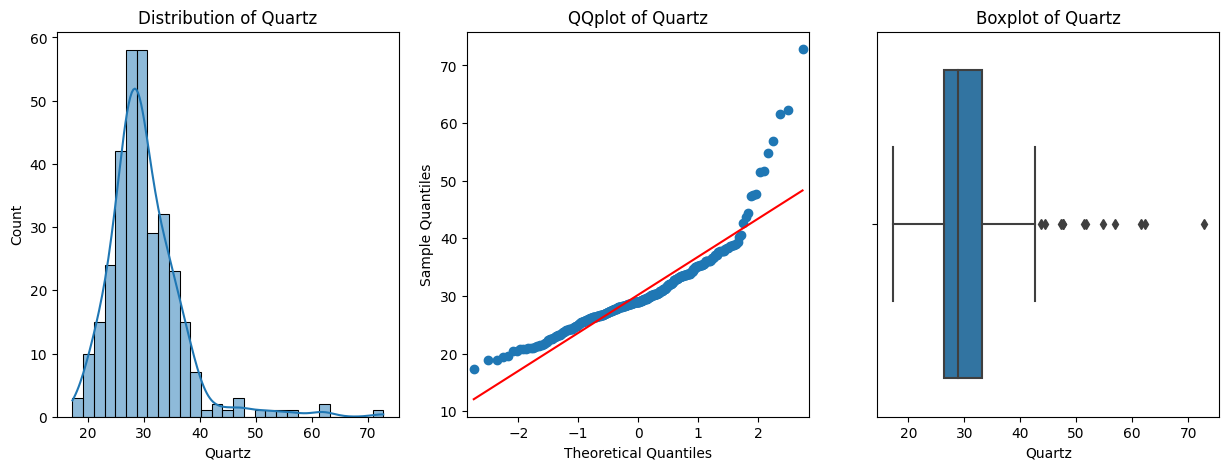

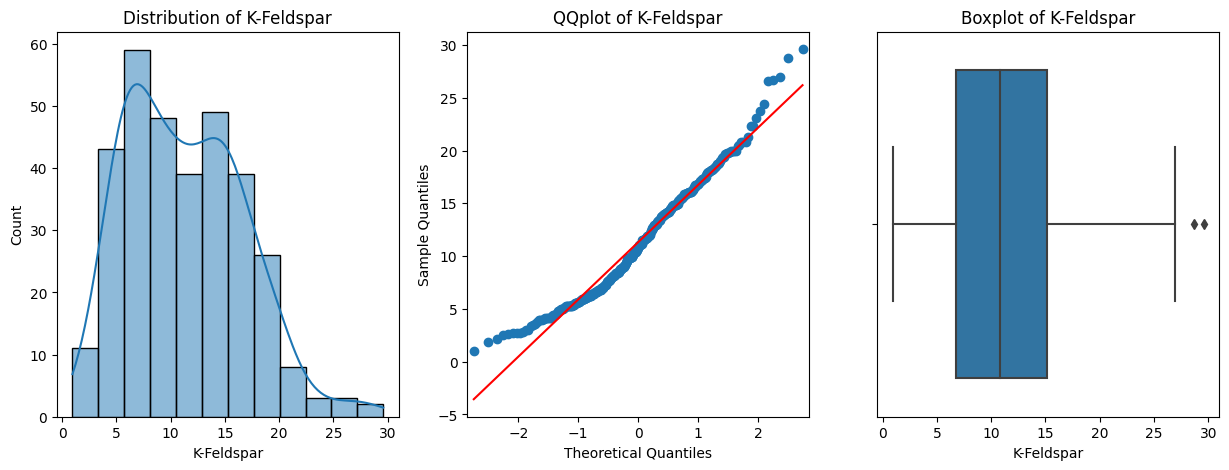

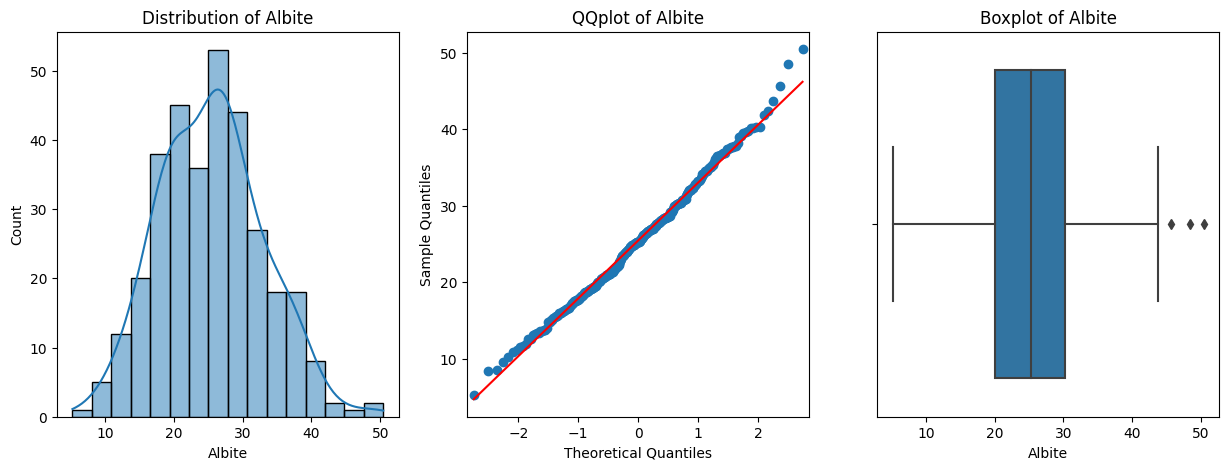

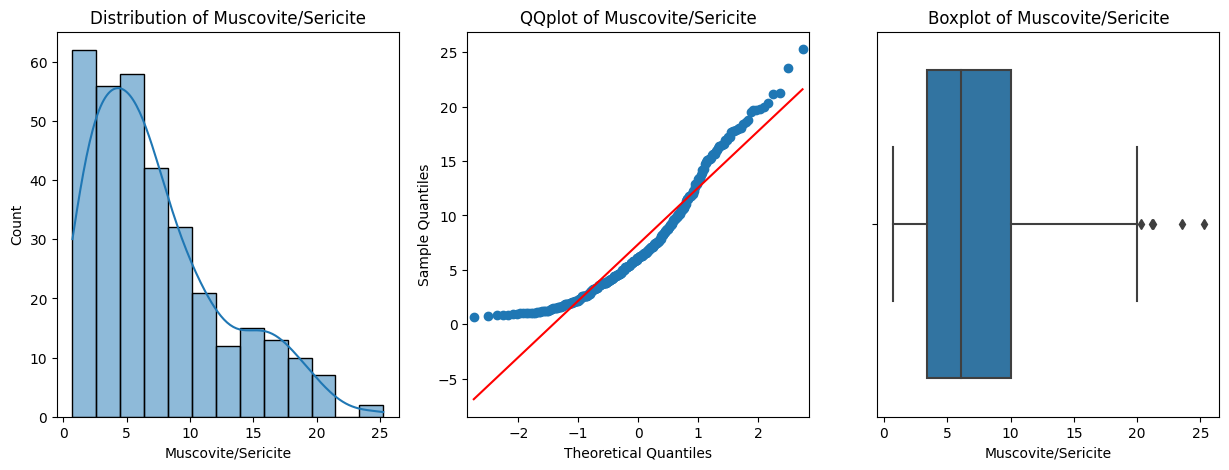

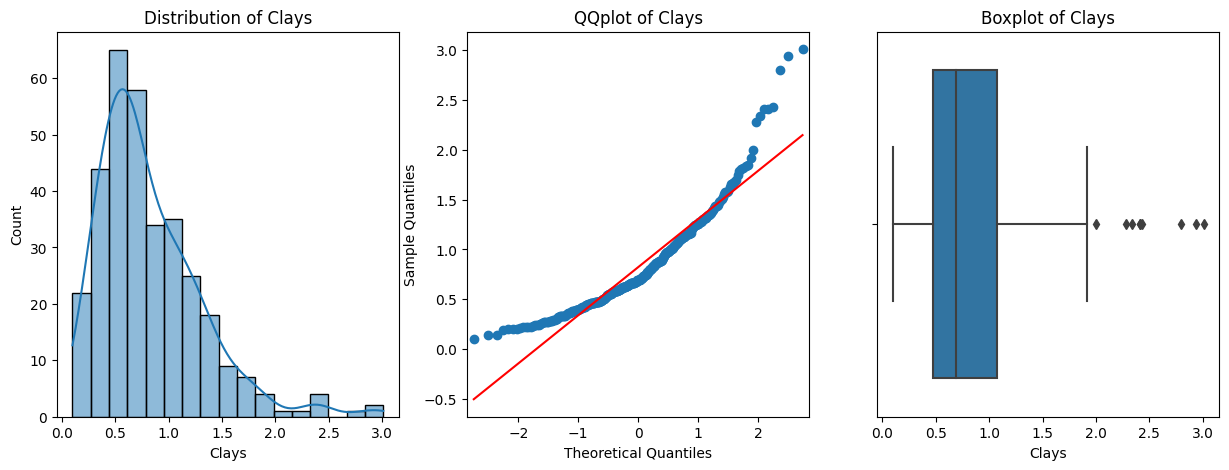

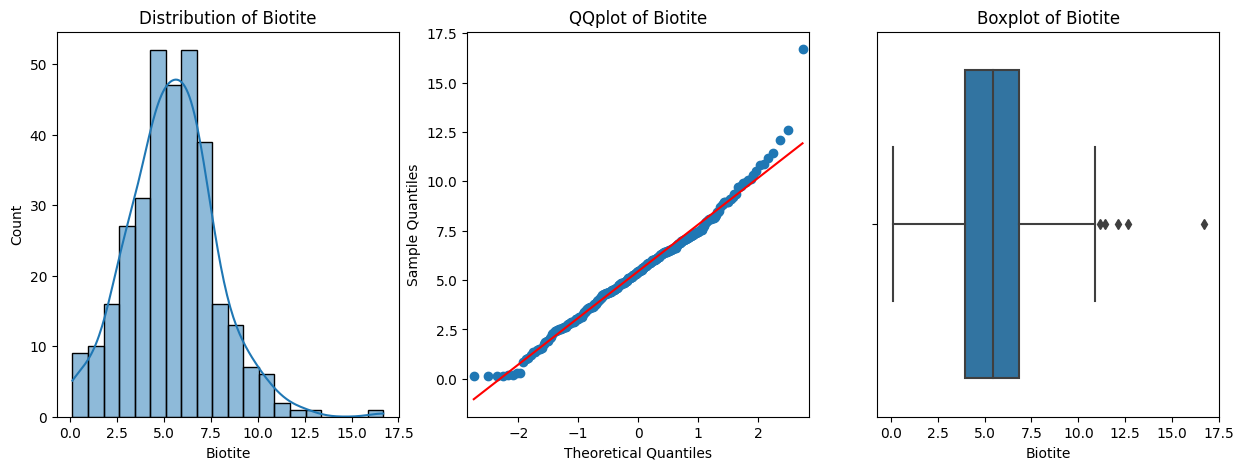

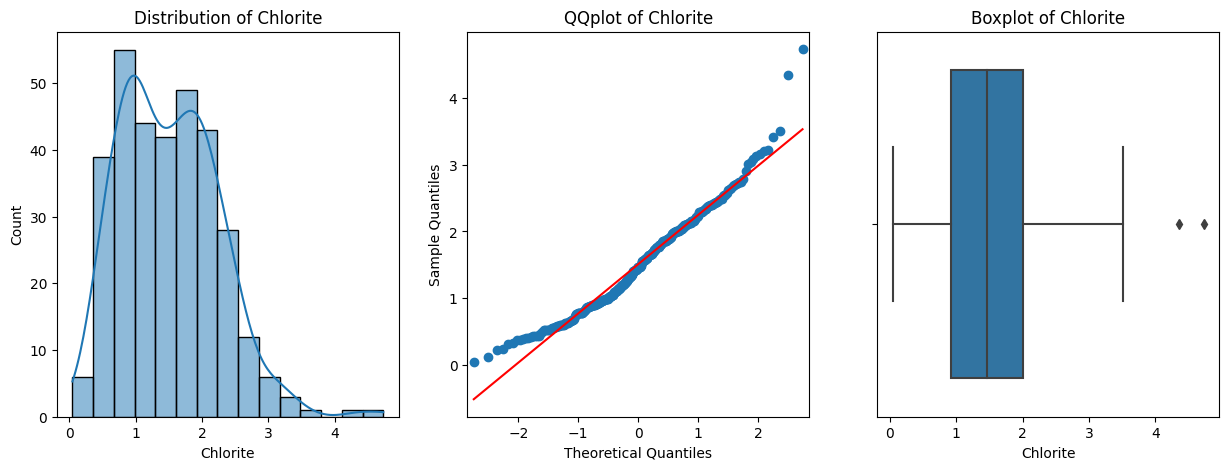

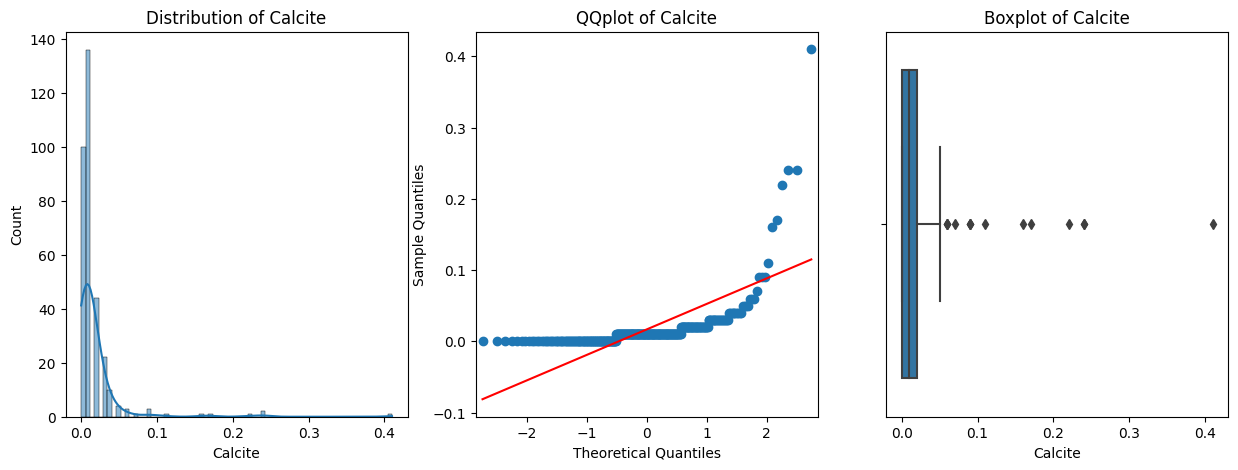

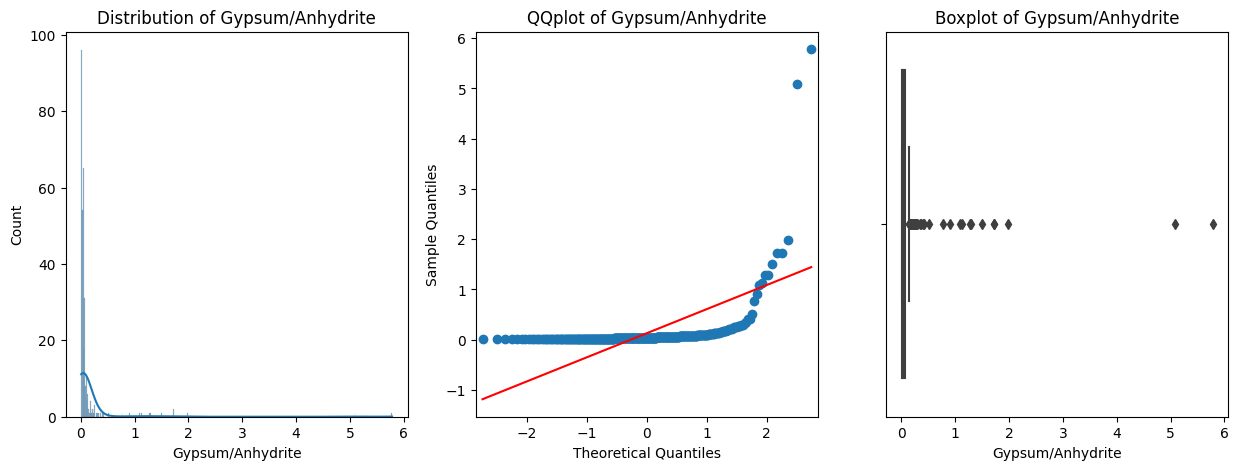

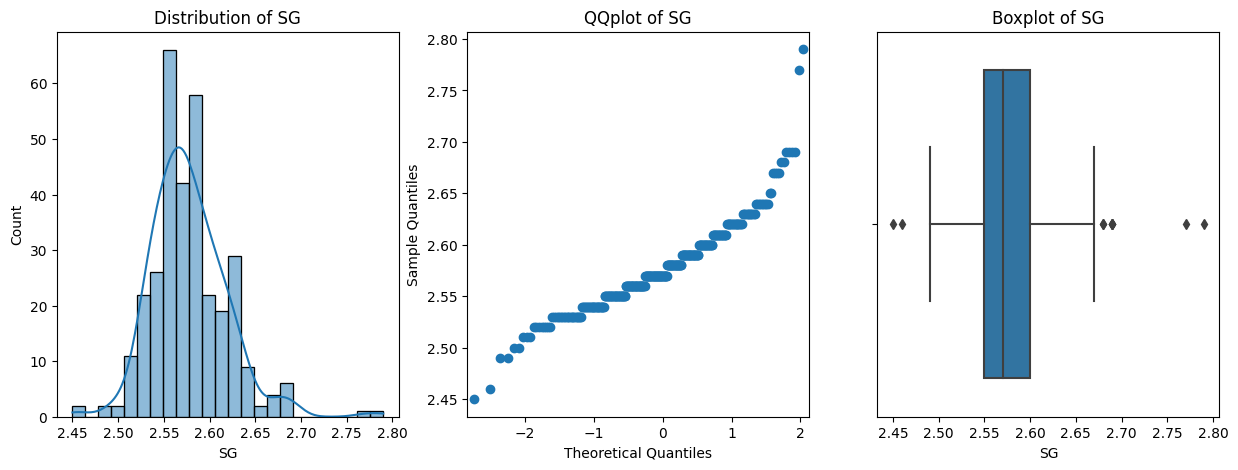

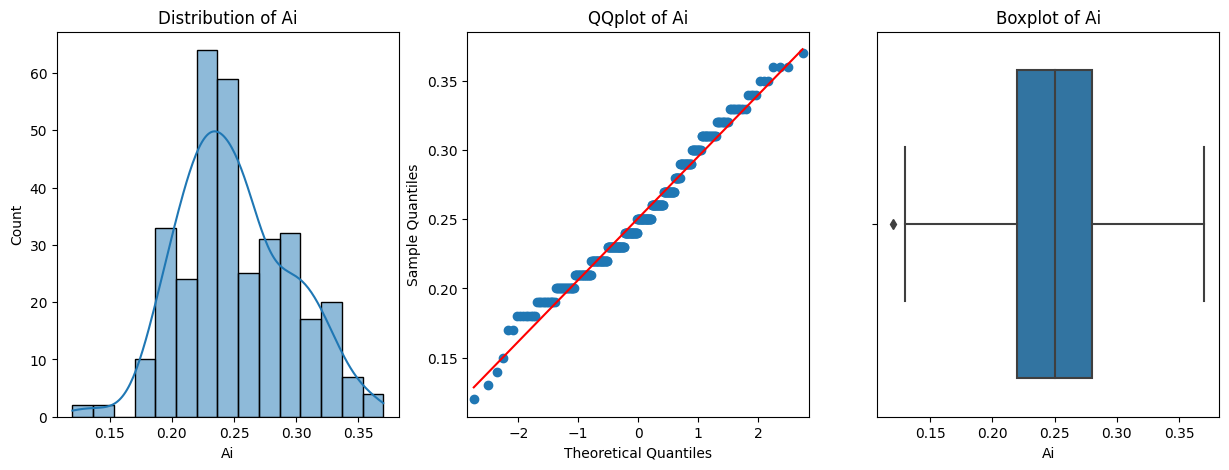

In [38]:
# Display for each feature: 
# histogram, to approximate the density
# qqplot, to have a better sense of the "gaussianity"
# boxplot, to spot outliers

for feature in num_var.columns:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(x = num_var[feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"QQplot of {feature}")
    qqplot(num_var[feature], line='s', ax = ax[1])
    
    ax[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(x = num_var[feature], ax = ax[2])
    


**Comment on normality:**
    most of the numerical variables, in particular Qemscan mineralogy exhibit non-normal distribution. These variables need to be transform.

### Variables tranformation

**Important note:**
The advantage of BoxCox/YeoJohnson transformation is that it provides an automated way to transform a dependent variable in a regression model so that the residuals for the model are as normal as possible.

In [39]:
num_var_list = ['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG']

In [40]:
# BoxCox transformation
yjt = vt.YeoJohnsonTransformer(variables=num_var_list)

In [41]:
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['midx', 'midy', 'midz', 'East', 'North',
                                 'elevation', 'Chalcocite-Digenite',
                                 'Covellite', 'Chalcopyrite', 'Bornite',
                                 'Pyrite', 'Enargite', 'Sphalerite', 'Quartz',
                                 'K-Feldspar', 'Albite', 'Muscovite/Sericite',
                                 'Clays', 'Biotite', 'Chlorite', 'Calcite',
                                 'Gypsum/Anhydrite', 'SG'])

In [42]:
# Exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

{'midx': 0.6389176080558627,
 'midy': 1.7666263011471501,
 'midz': 0.8840408048032135,
 'East': 0.6389176080558627,
 'North': 1.7666263011471501,
 'elevation': 0.8840408048032135,
 'Chalcocite-Digenite': -1.5710384590490123,
 'Covellite': -14.48588331480163,
 'Chalcopyrite': -0.1483508411619359,
 'Bornite': -5.567125195932321,
 'Pyrite': -1.0252621877492976,
 'Enargite': -26531.781900769092,
 'Sphalerite': 11.215082900440068,
 'Quartz': -0.9944775902536166,
 'K-Feldspar': 0.4553281498292723,
 'Albite': 0.7323053781688517,
 'Muscovite/Sericite': 0.09094577094101186,
 'Clays': -0.8774031058363843,
 'Biotite': 0.7746841099440961,
 'Chlorite': 0.09438156160802016,
 'Calcite': -38.61431953837833,
 'Gypsum/Anhydrite': -9.232040697852472,
 'SG': -14.677979380024675}

In [43]:
# Train set transformation
X_train = yjt.transform(X_train)

In [44]:
# Test set transformation
X_test = yjt.transform(X_test)

In [45]:
num_var_tf = X_train.select_dtypes(exclude='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_8\3101864655.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3, figsize = (15,5))


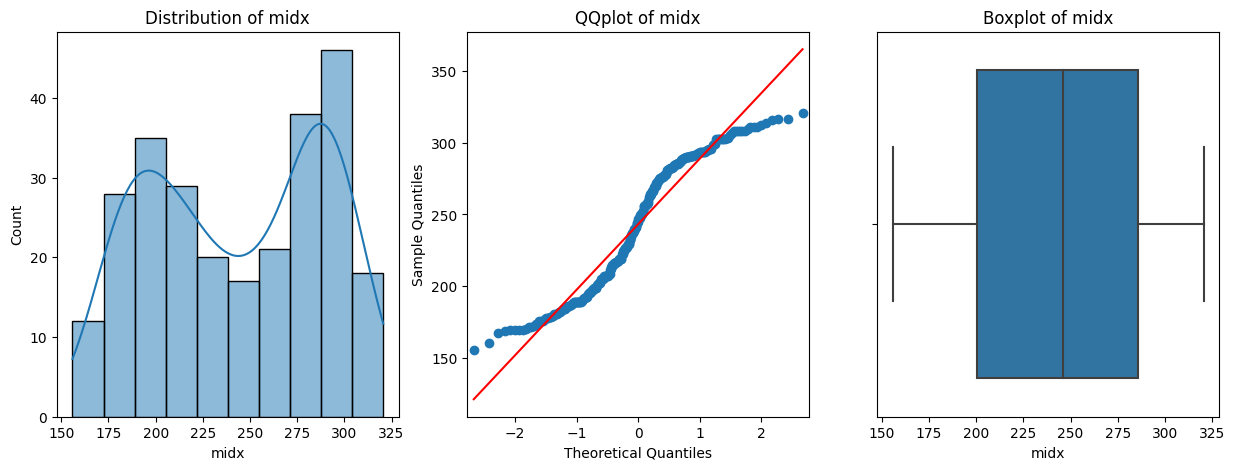

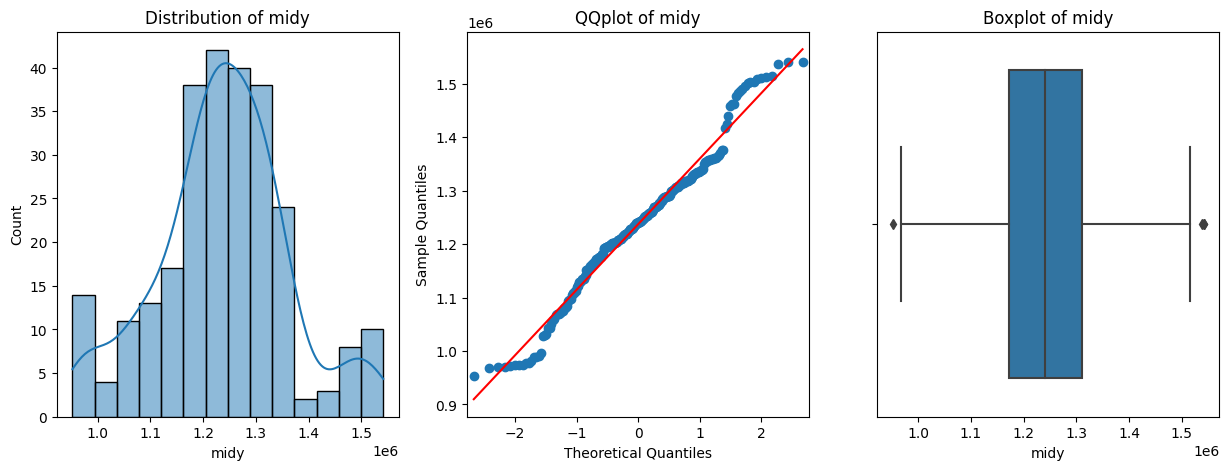

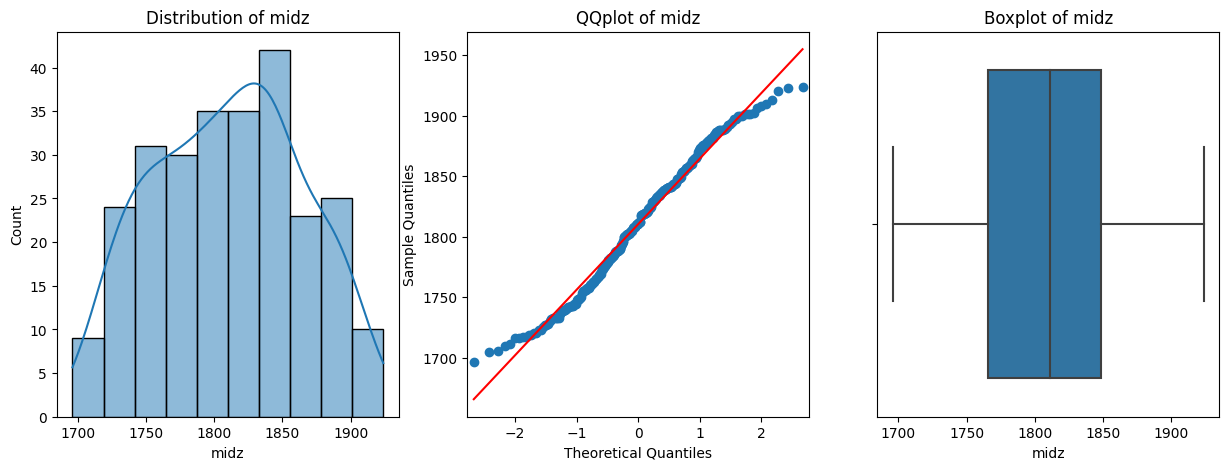

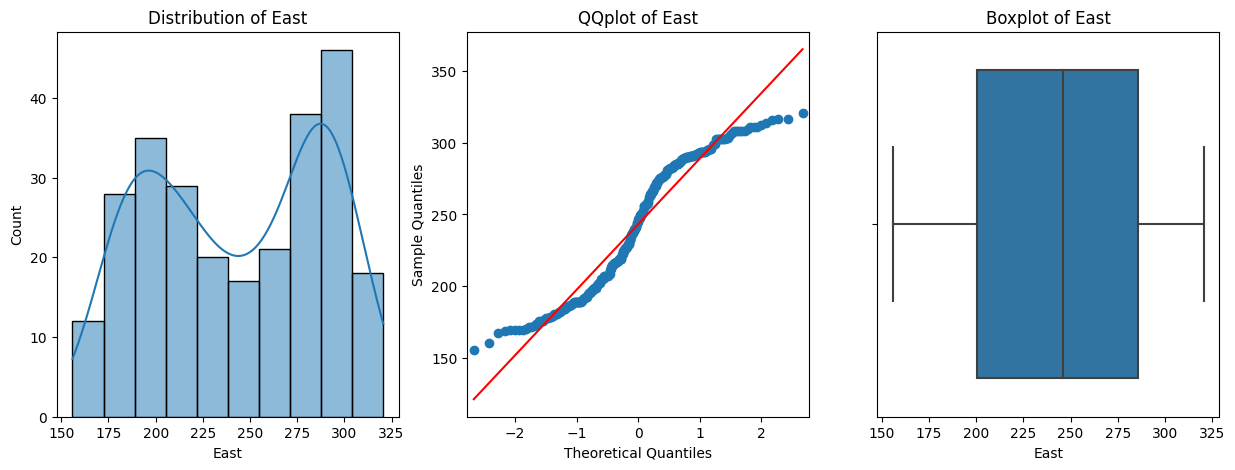

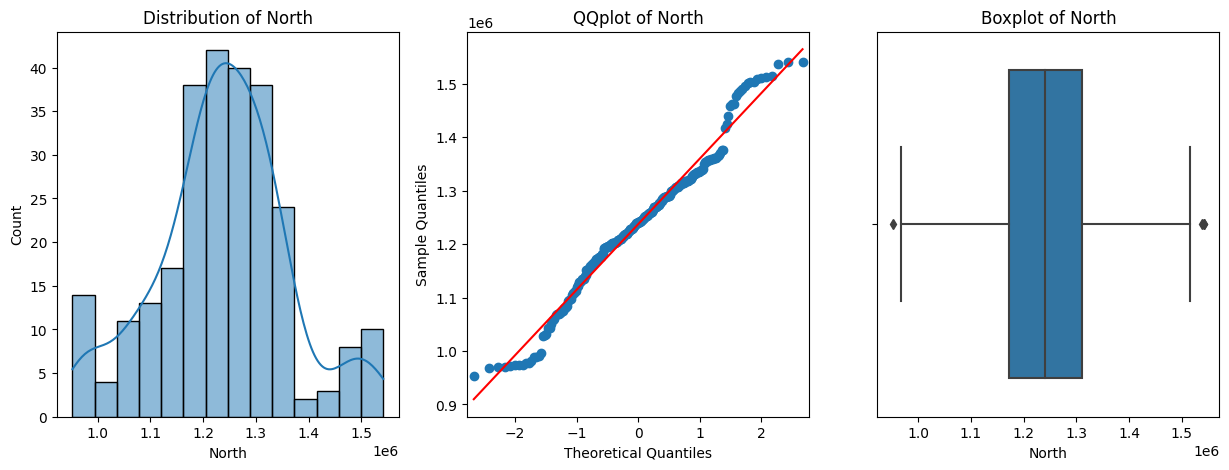

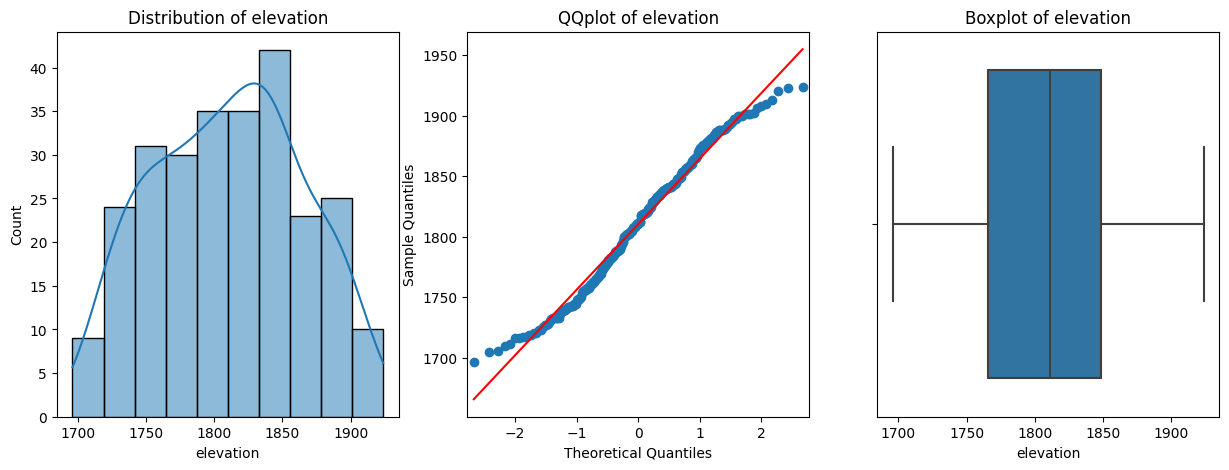

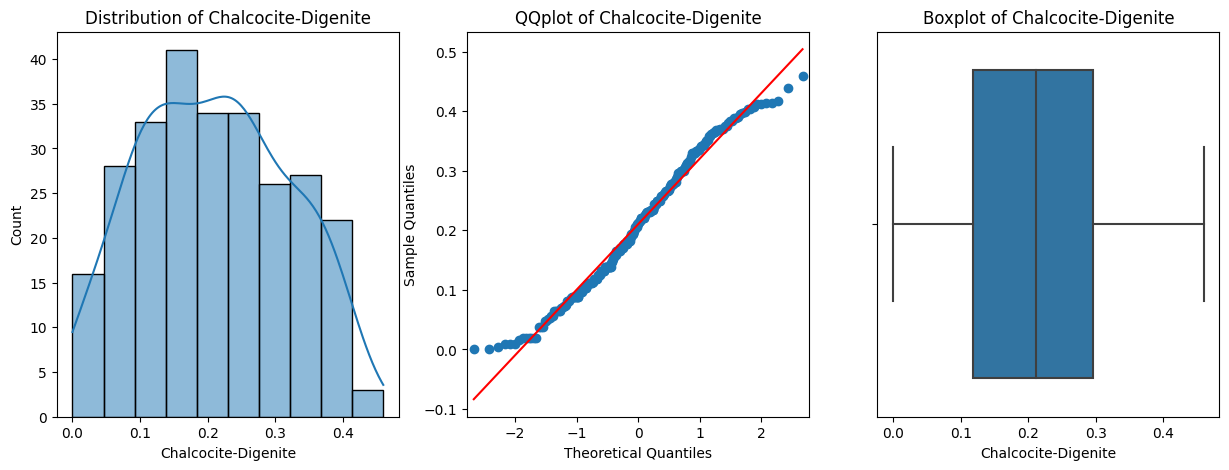

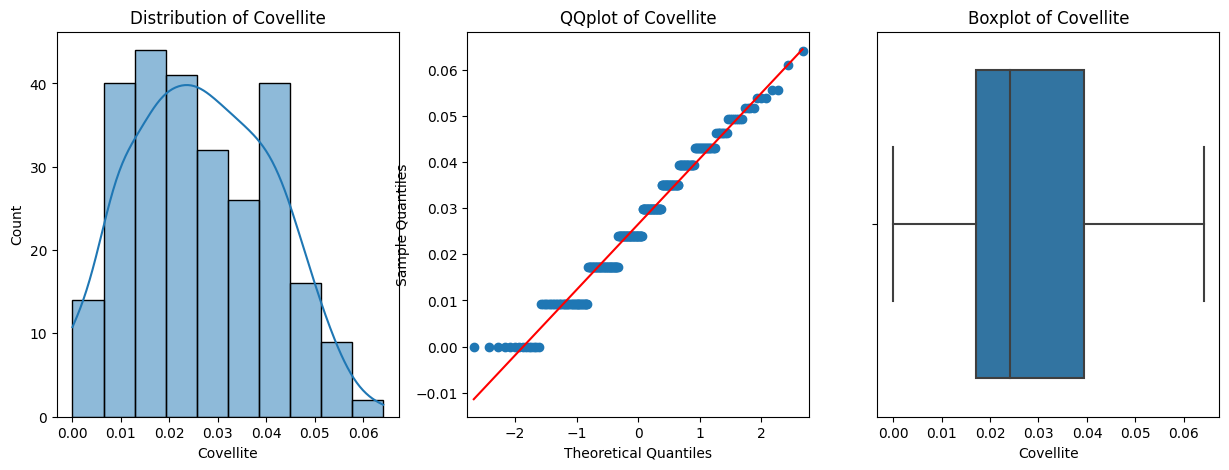

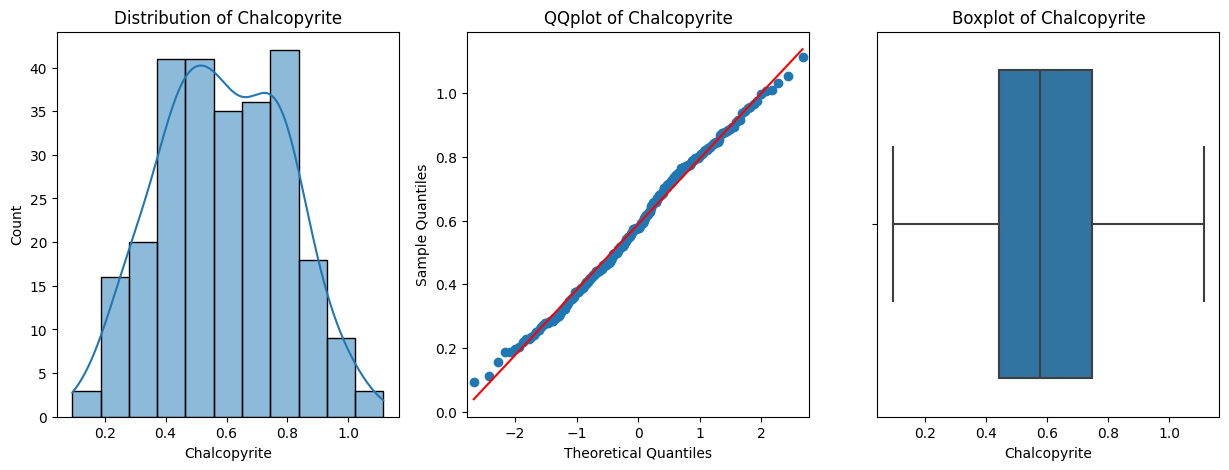

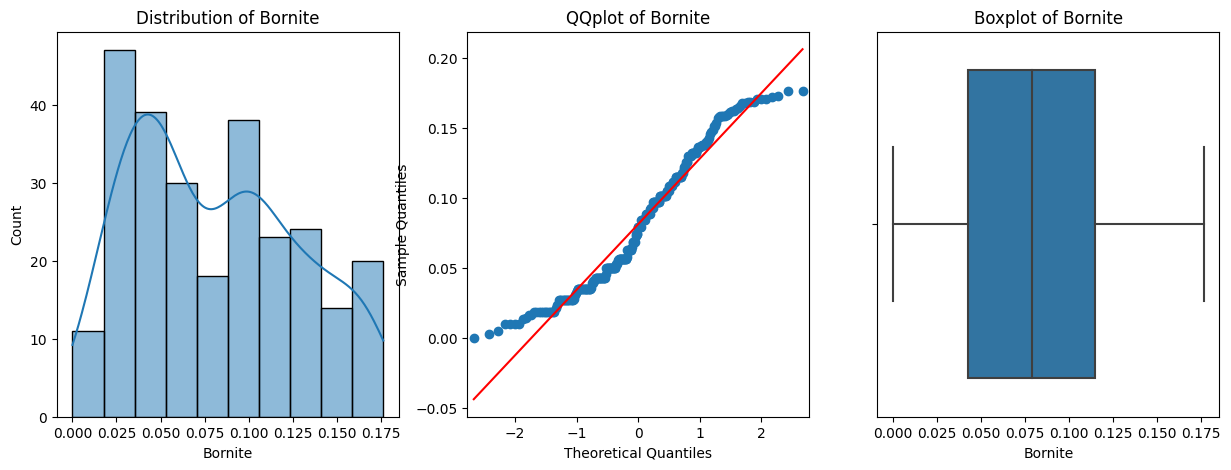

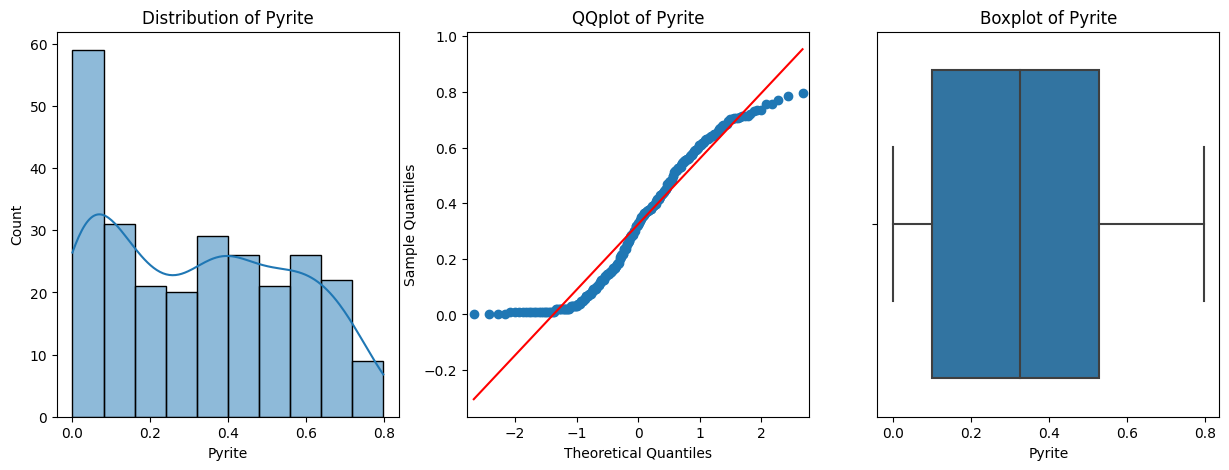

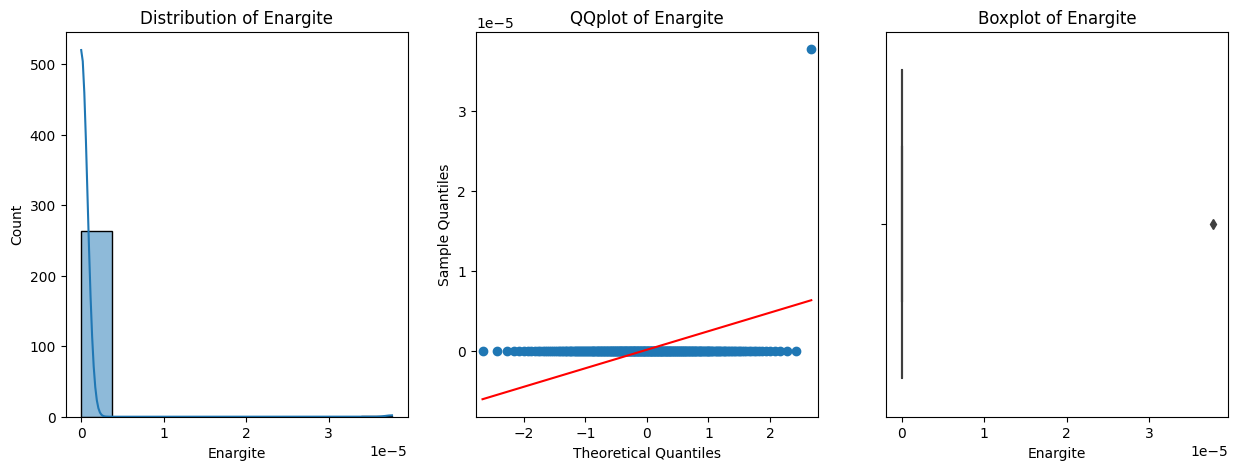

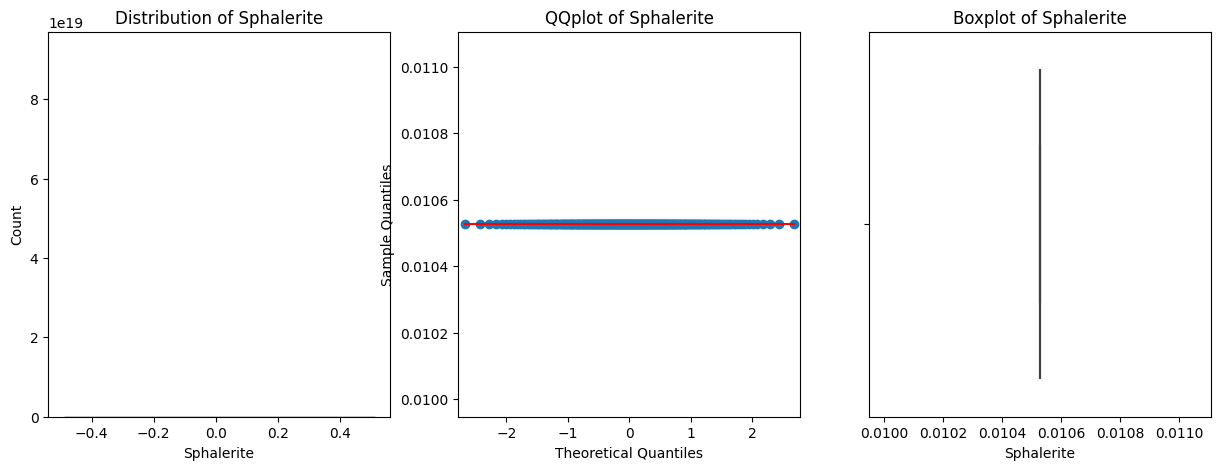

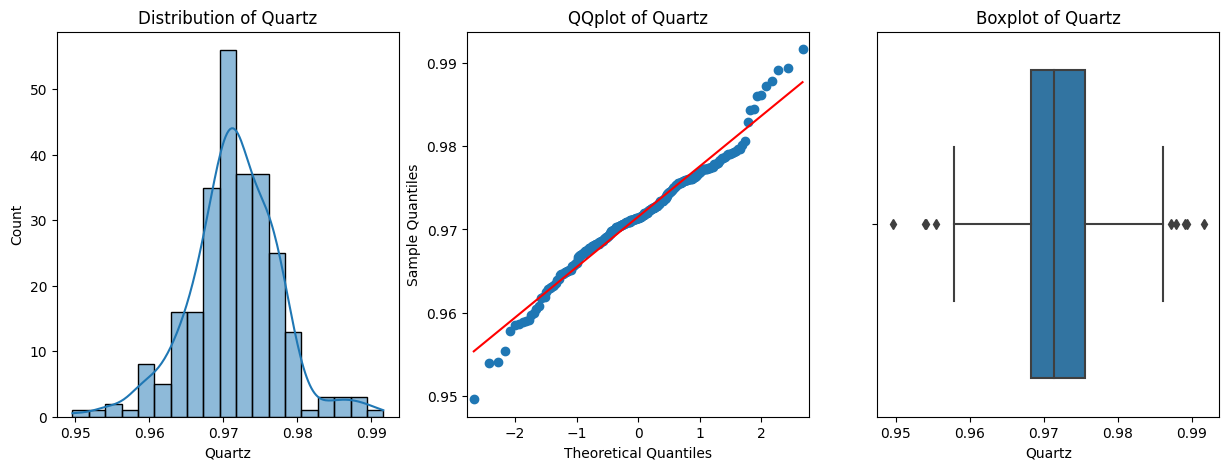

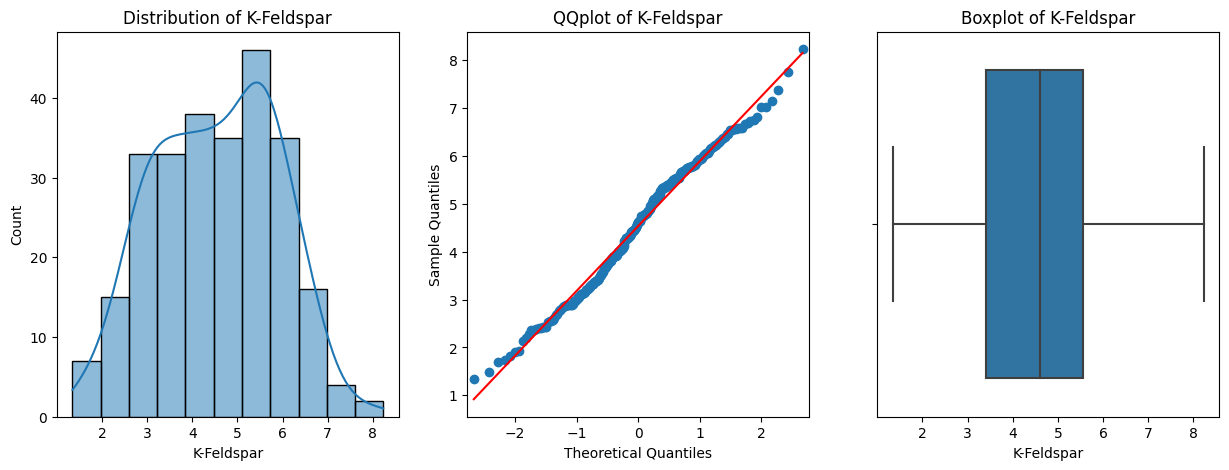

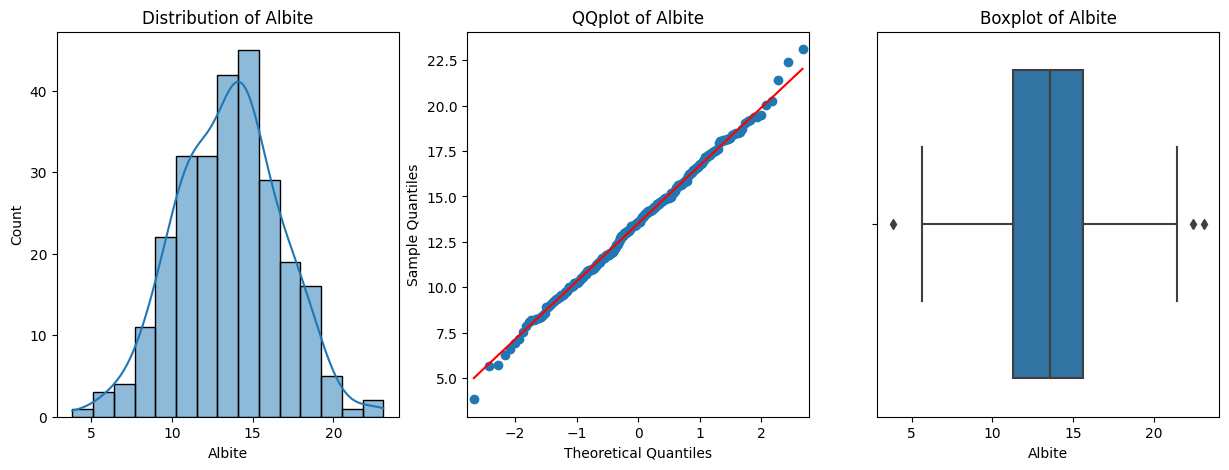

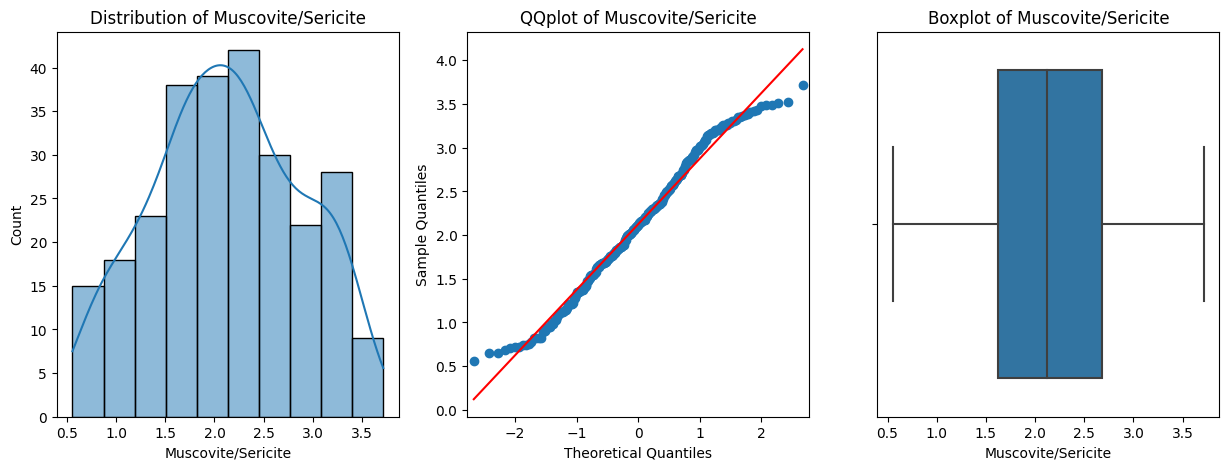

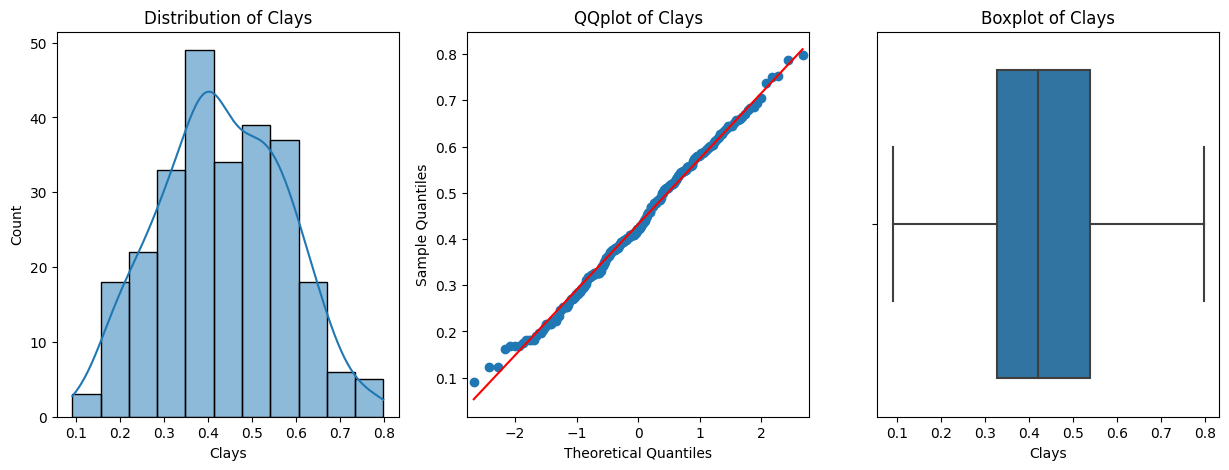

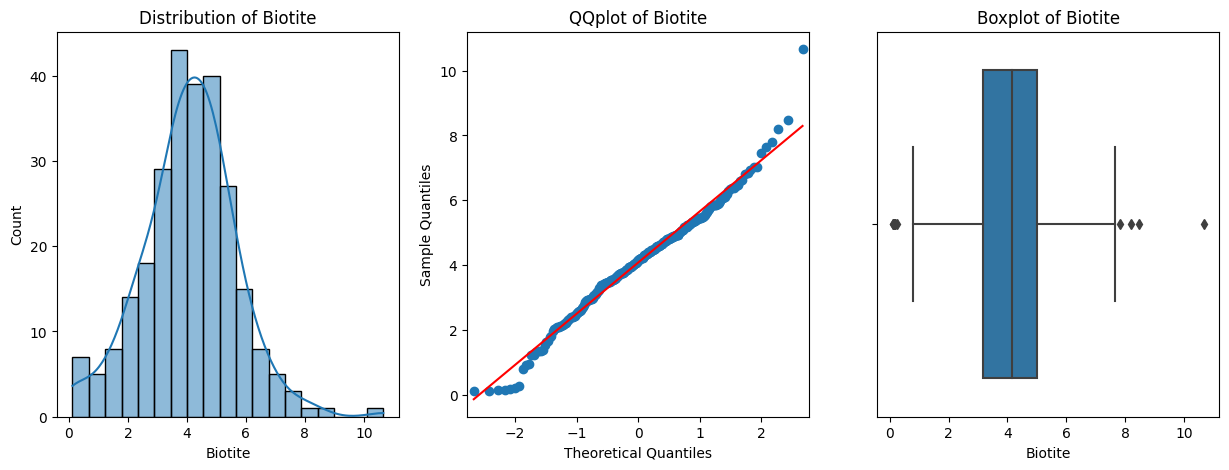

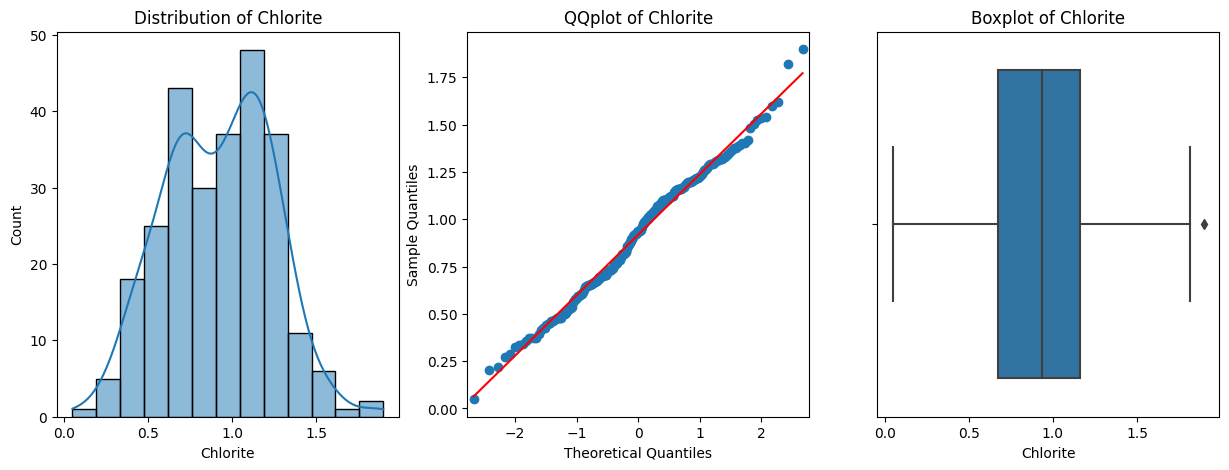

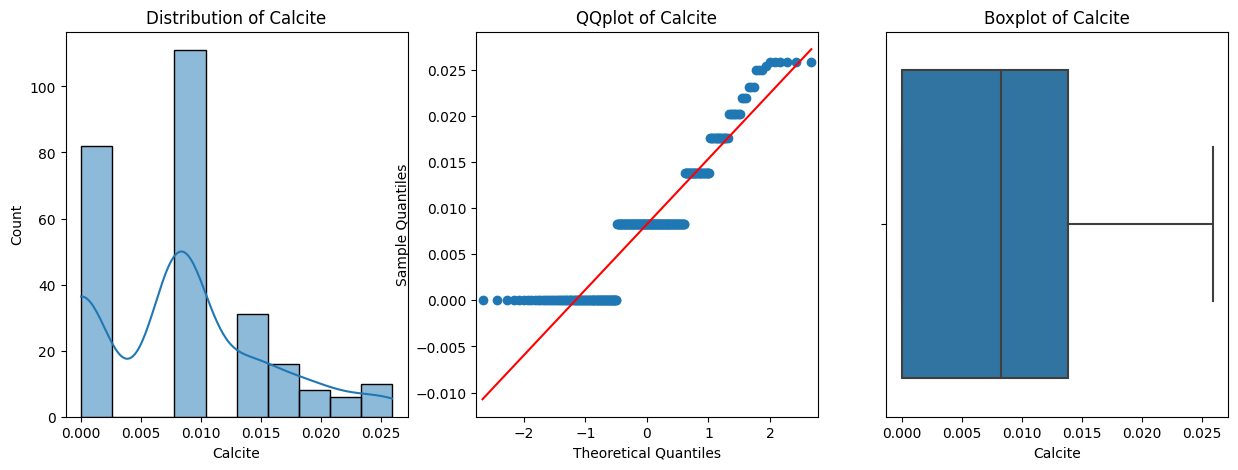

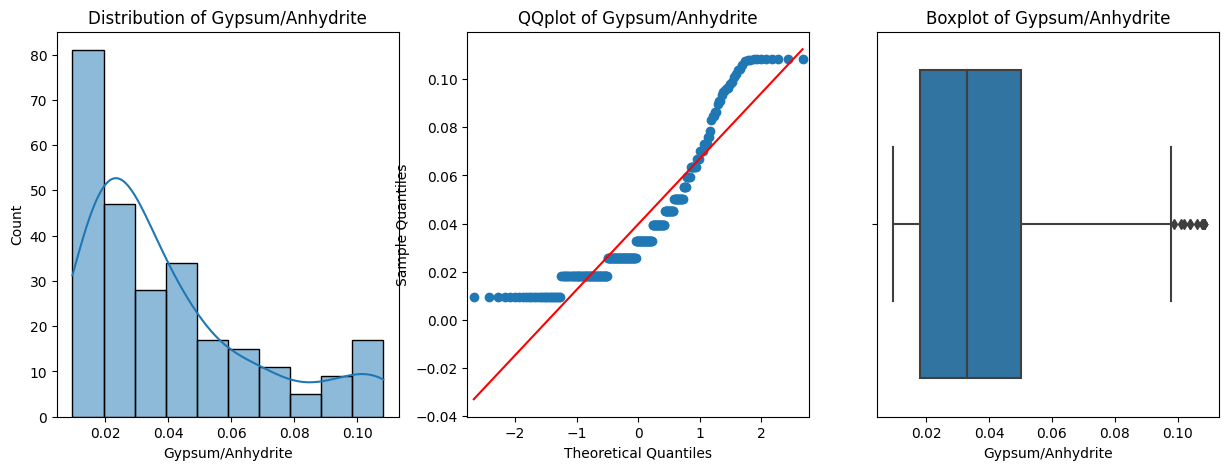

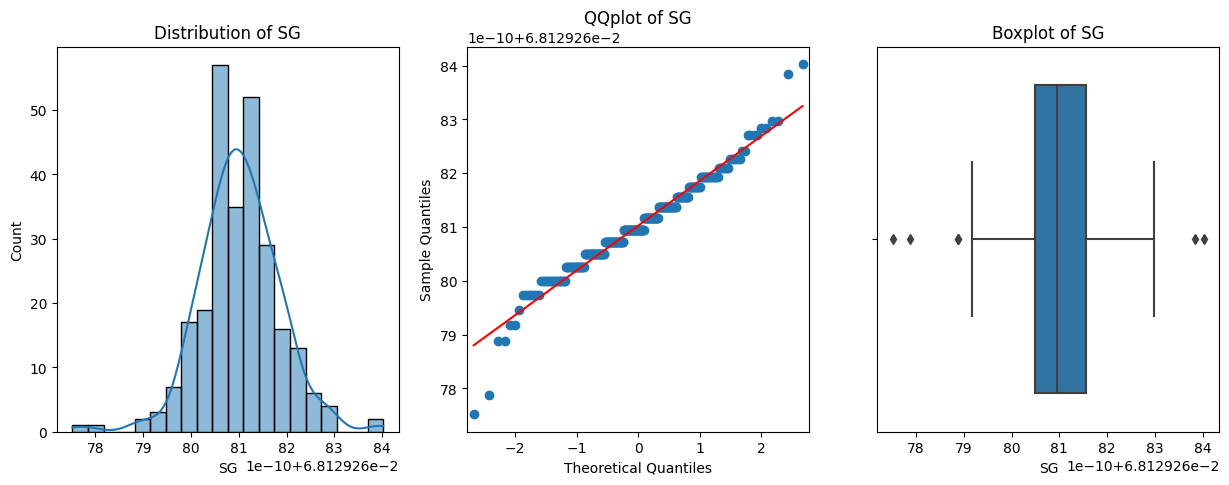

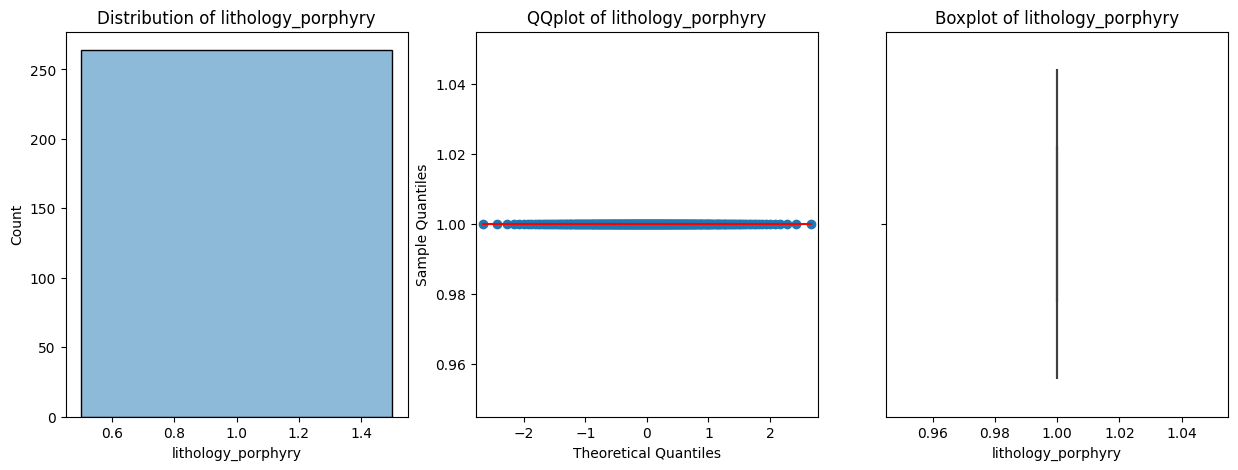

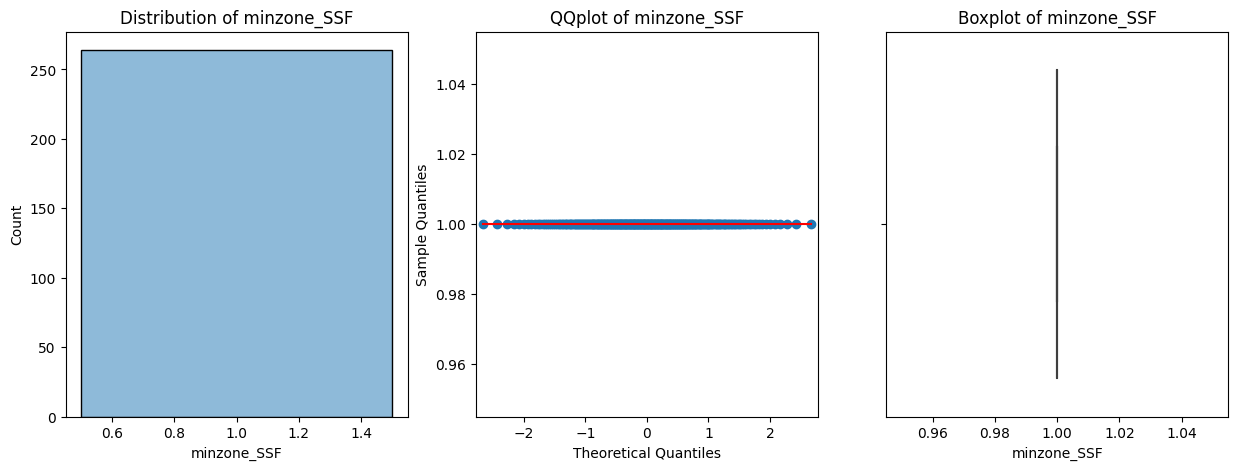

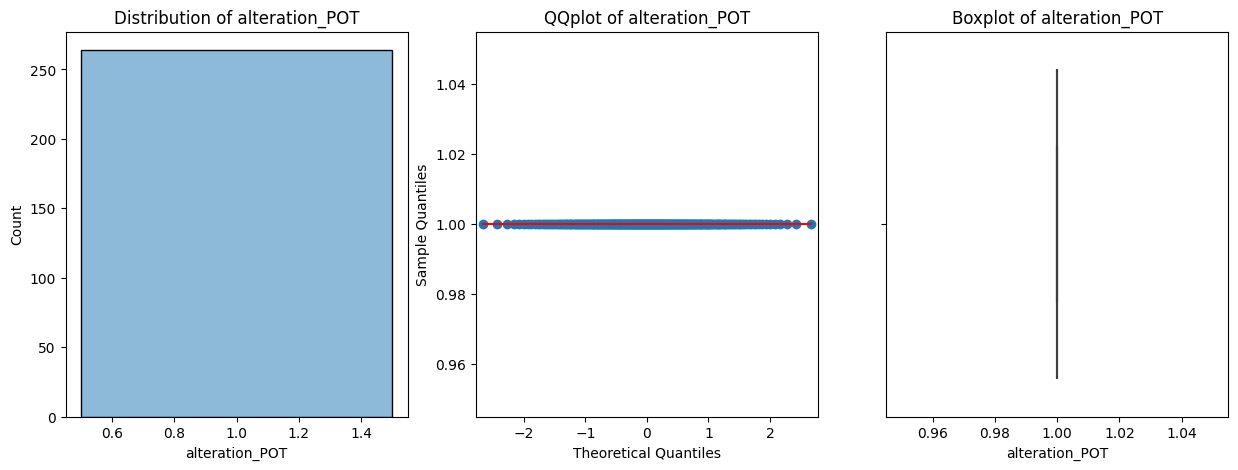

In [46]:
# Distribution of transformed variables
for feature in num_var_tf.columns:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(x = num_var_tf[feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"QQplot of {feature}")
    qqplot(num_var_tf[feature], line='s', ax = ax[1])
    
        
    ax[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(x = num_var_tf[feature], ax = ax[2])

**Comment on outliers:**
significant amount of numerical variables with outliers. It might affect the performance of regression models. For these variables, capping may be applied. 

In [47]:
# Variables for capping, type of tail
var_cap_both = ['midy','North','Quartz','Albite','Biotite','SG']
var_cap_right = ['Covellite','Chlorite','Gypsum/Anhydrite']

In [48]:
X_train.head()

midx          midy         midz        East         North  \
356  274.372337  1.032323e+06  1788.595809  274.372337  1.032323e+06   
460  178.609128  1.417399e+06  1820.000573  178.609128  1.417399e+06   
327  281.824585  9.738772e+05  1812.284285  281.824585  9.738772e+05   
340  278.433356  9.703892e+05  1811.247271  278.433356  9.703892e+05   
326  281.824585  9.738772e+05  1812.284285  281.824585  9.738772e+05   

       elevation  Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
356  1788.595809             0.019498   0.009266      0.867146  0.084046  ...   
460  1820.000573             0.368201   0.017216      0.547466  0.057984  ...   
327  1812.284285            -0.000000  -0.000000      0.794948 -0.000000  ...   
340  1811.247271             0.009873  -0.000000      0.967003  0.009680  ...   
326  1812.284285            -0.000000  -0.000000      0.894209  0.009680  ...   

     Muscovite/Sericite     Clays   Biotite  Chlorite   Calcite  \
356            2.175617  0.317075  4.453654  1.123851  0.008262   
460            1.765198  0.215618  5.826977  0.818536  0.008262   
327            2.881983  0.228201  2.905169  1.053439  0.025891   
340            2.677187  0.221956  3.469355  1.069442 -0.000000   
326            2.911917  0.215618  2.582103  0.995705  0.025885   

     Gypsum/Anhydrite        SG  lithology_porphyry  minzone_SSF  \
356          0.050318  0.068129                   1            1   
460          0.018098  0.068129                   1            1   
327          0.108318  0.068129                   1            1   
340          0.018098  0.068129                   1            1   
326          0.108318  0.068129                   1            1   

     alteration_POT  
356               1  
460               1  
327               1  
340               1  
326               1  

[5 rows x 26 columns]

### Outlier removing

In [49]:
pipe = Pipeline([
    ('Windsorizer_both', Winsorizer(capping_method='quantiles',
                                   tail='both',
                                   fold=0.01,
                                   variables=var_cap_both)),
    
    ('Windsorizer_right', Winsorizer(capping_method='quantiles',
                                   tail='right',
                                   fold=0.01,
                                   variables=var_cap_right))
          
])

In [50]:
pipe.fit(X_train)

Pipeline(steps=[('Windsorizer_both',
                 Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
                            variables=['midy', 'North', 'Quartz', 'Albite',
                                       'Biotite', 'SG'])),
                ('Windsorizer_right',
                 Winsorizer(capping_method='quantiles', fold=0.01,
                            variables=['Covellite', 'Chlorite',
                                       'Gypsum/Anhydrite']))])

In [51]:
# Train set transformation
X_train = pipe.transform(X_train)

In [52]:
# Test set transformation
X_test = pipe.transform(X_test)

In [53]:
num_var_tf = X_train.select_dtypes(exclude='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_8\3101864655.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3, figsize = (15,5))


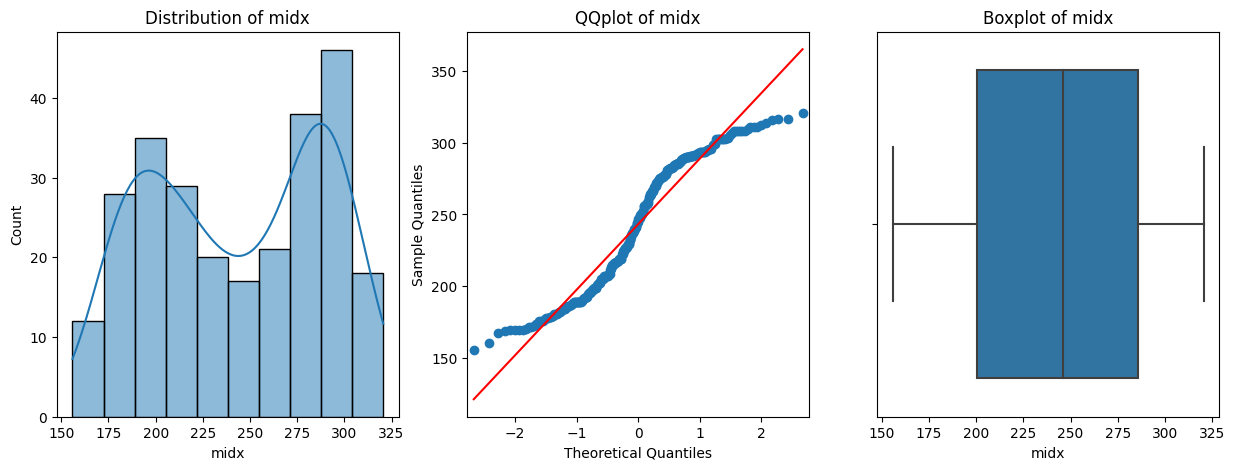

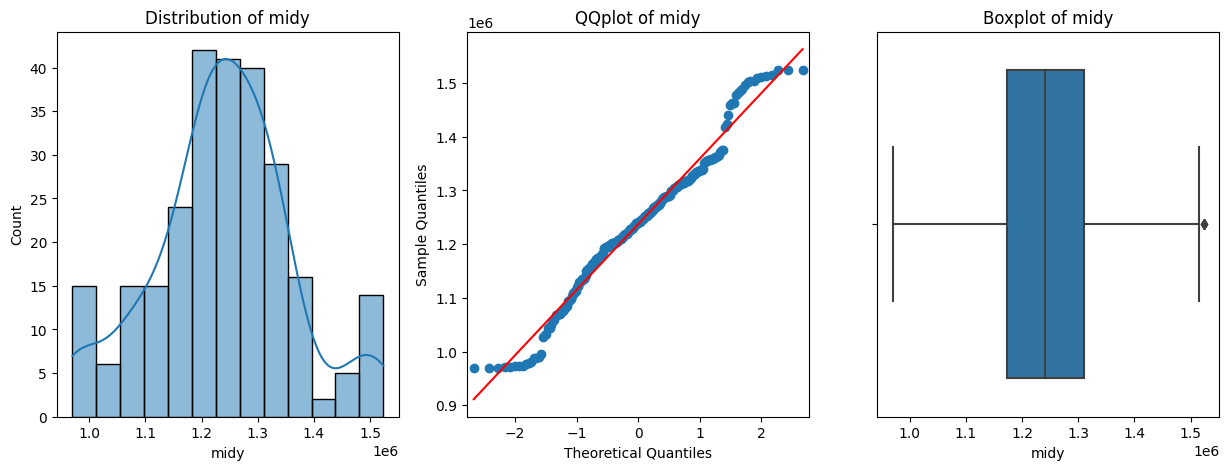

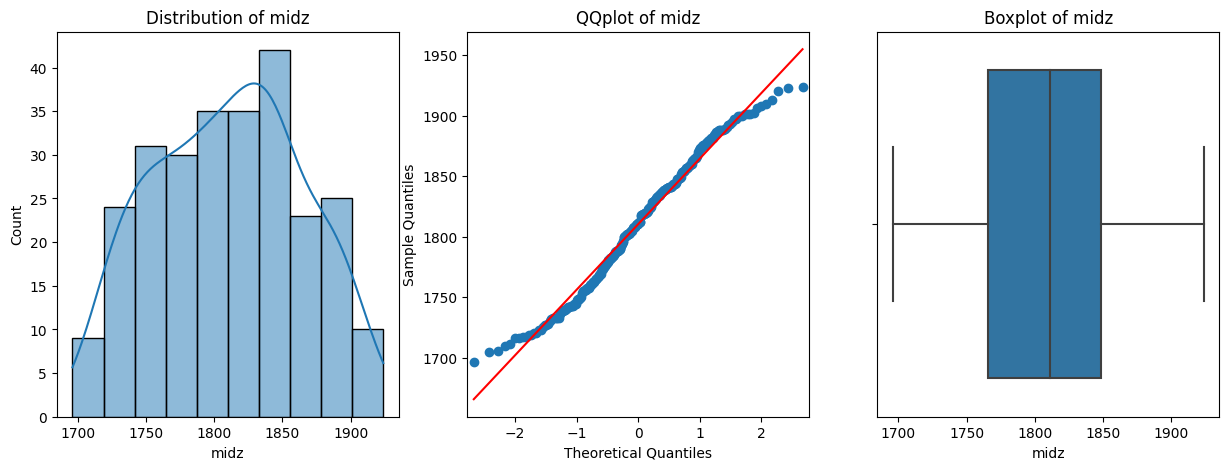

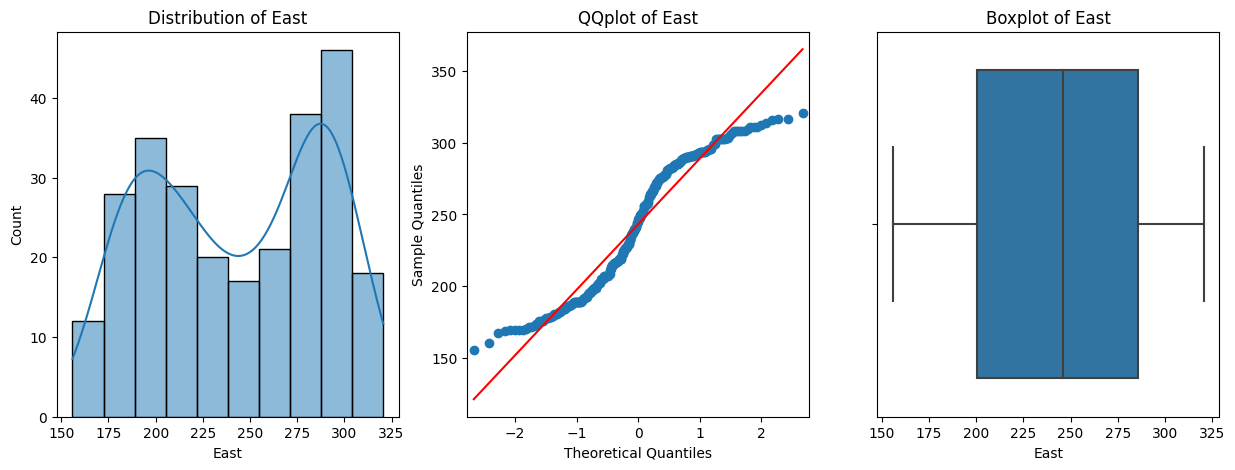

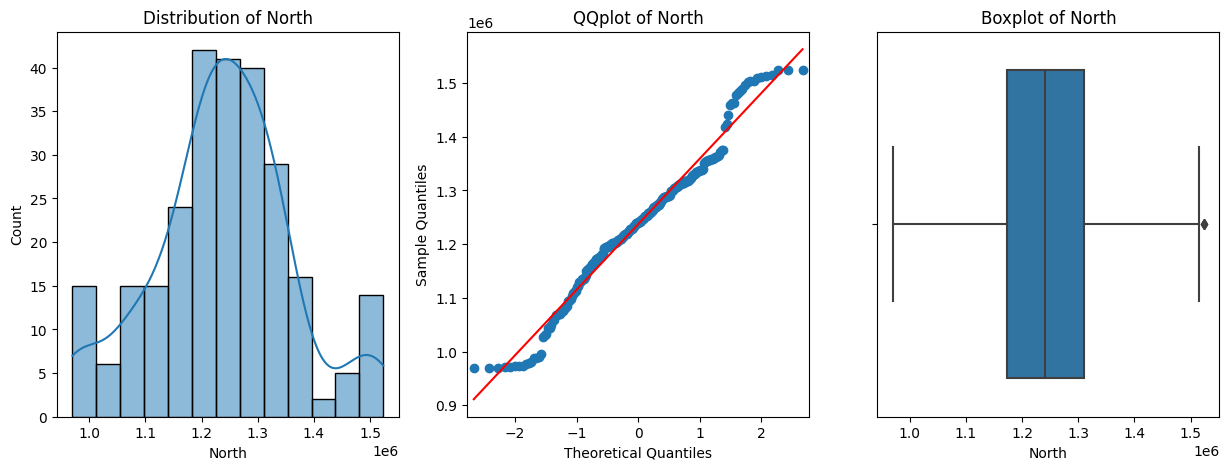

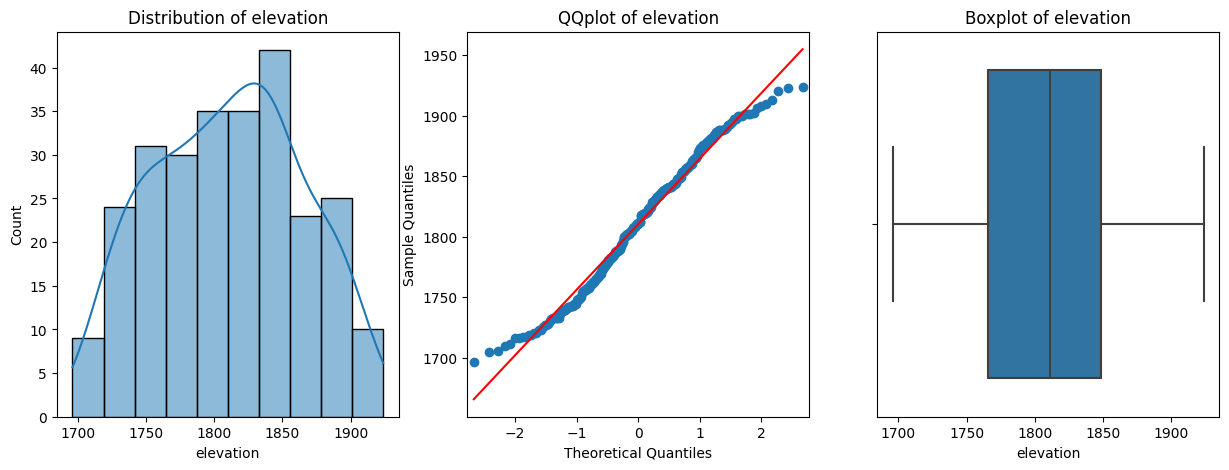

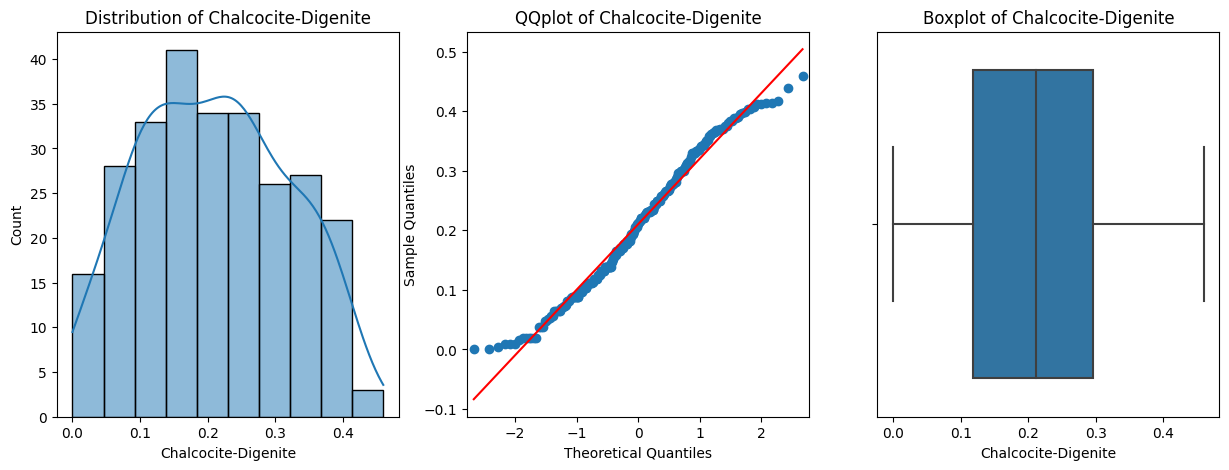

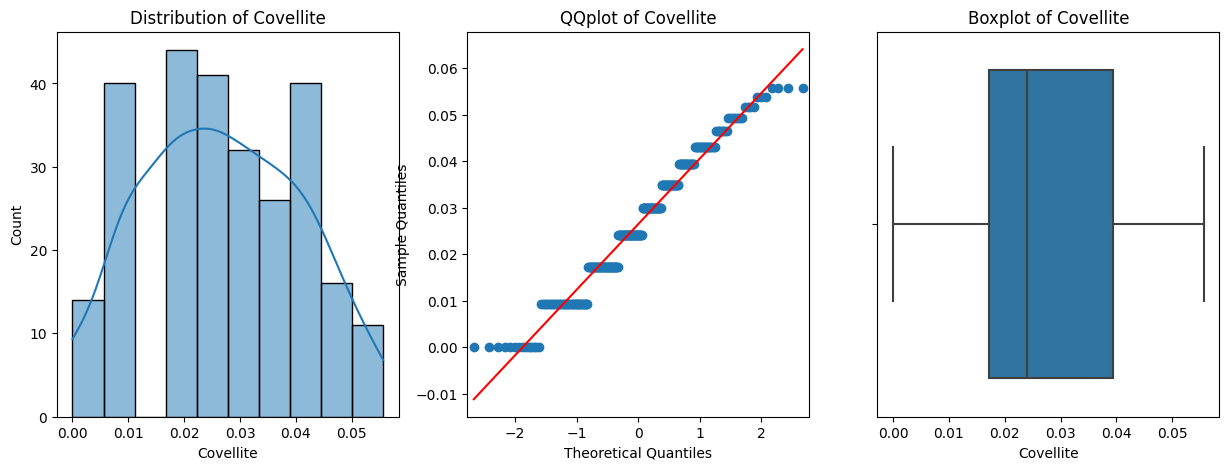

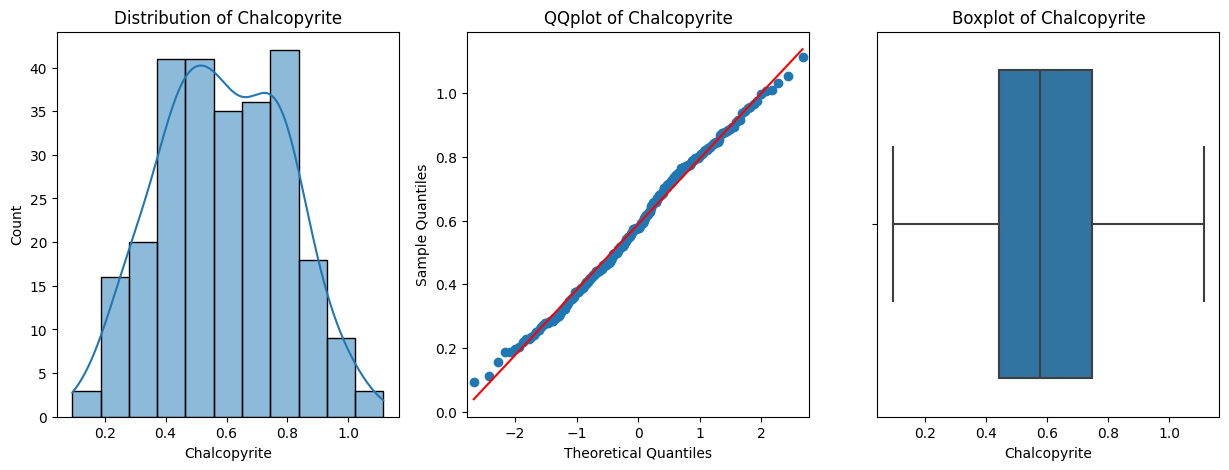

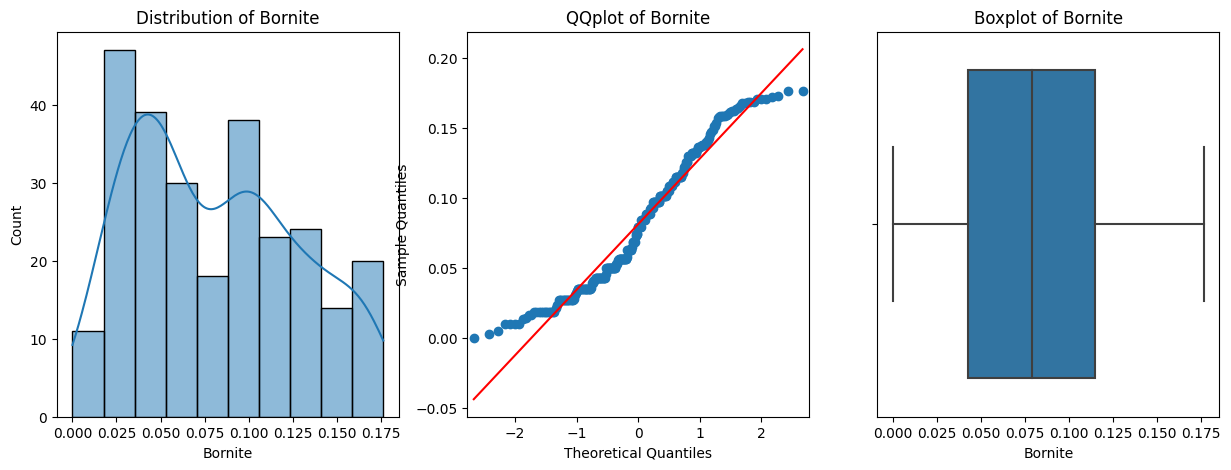

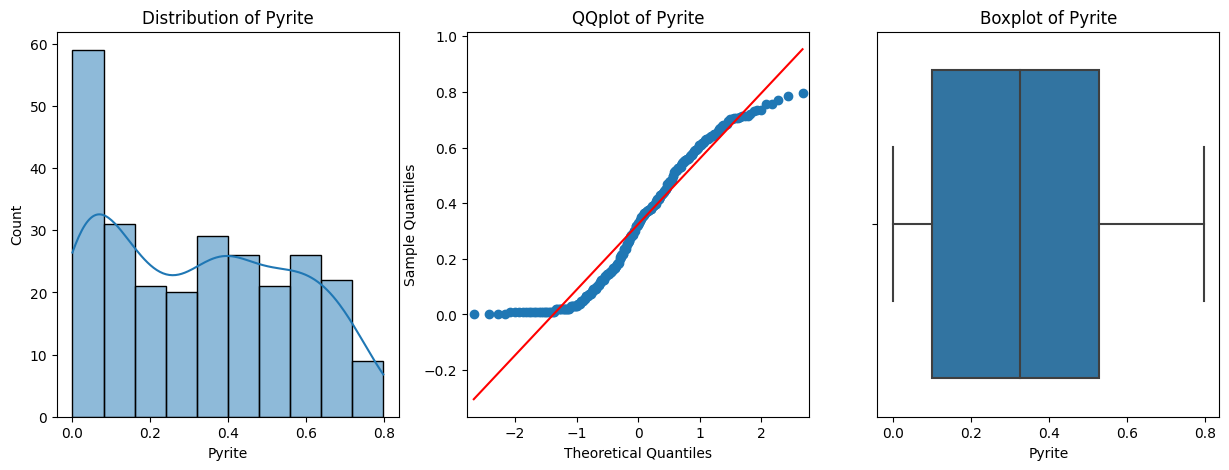

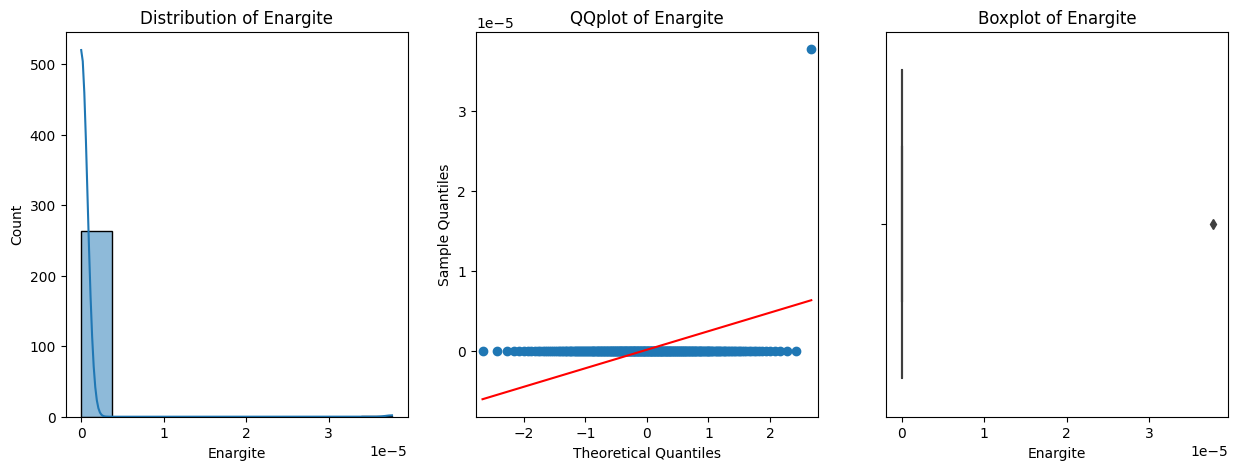

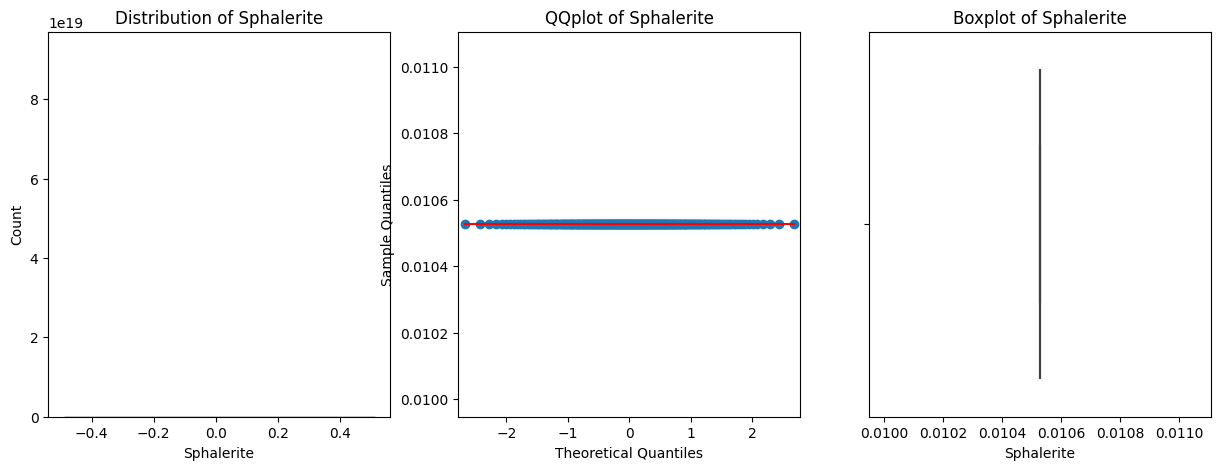

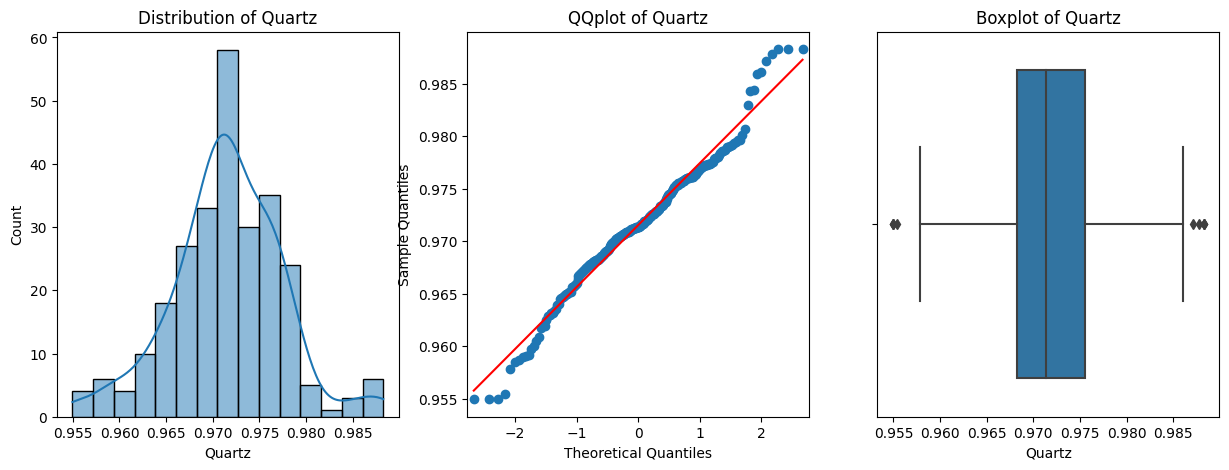

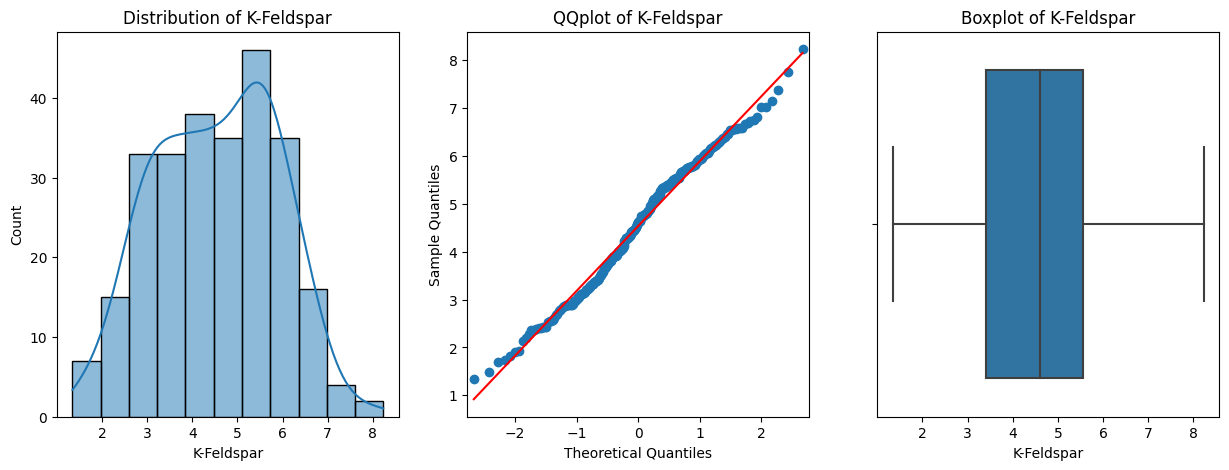

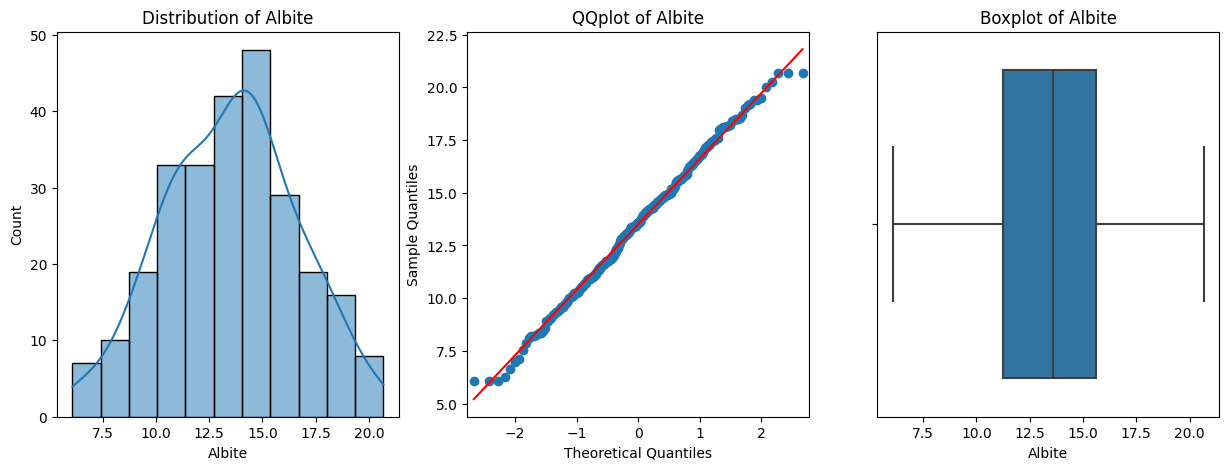

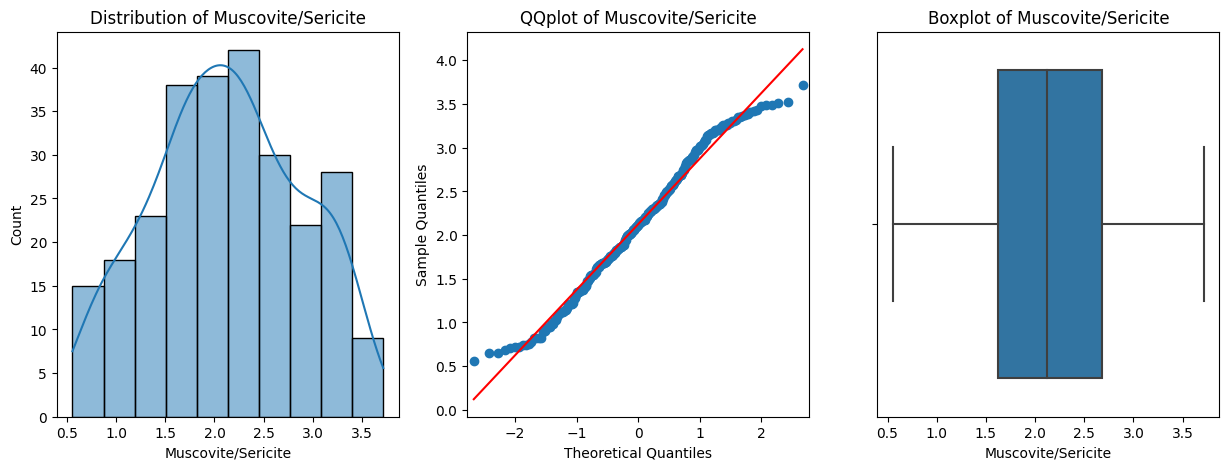

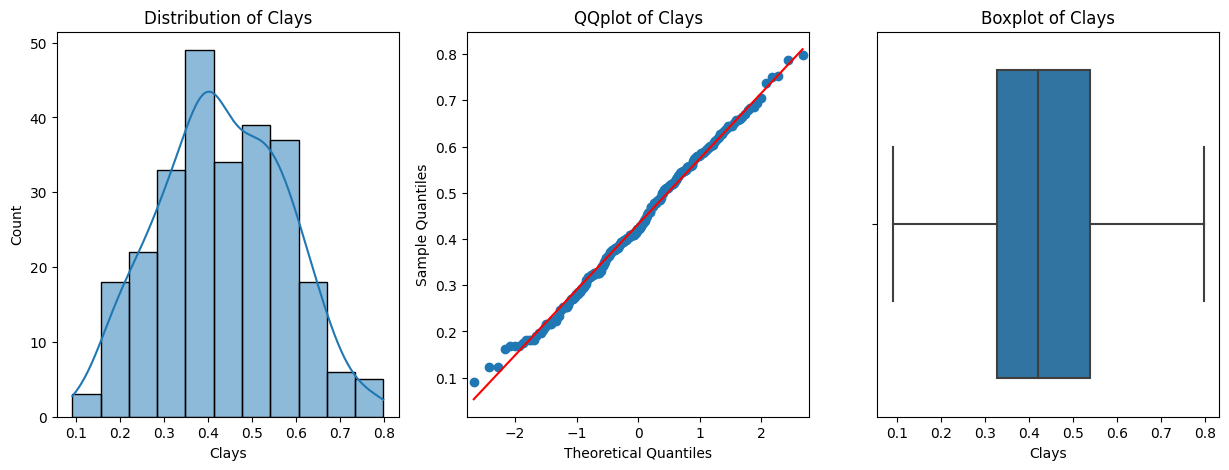

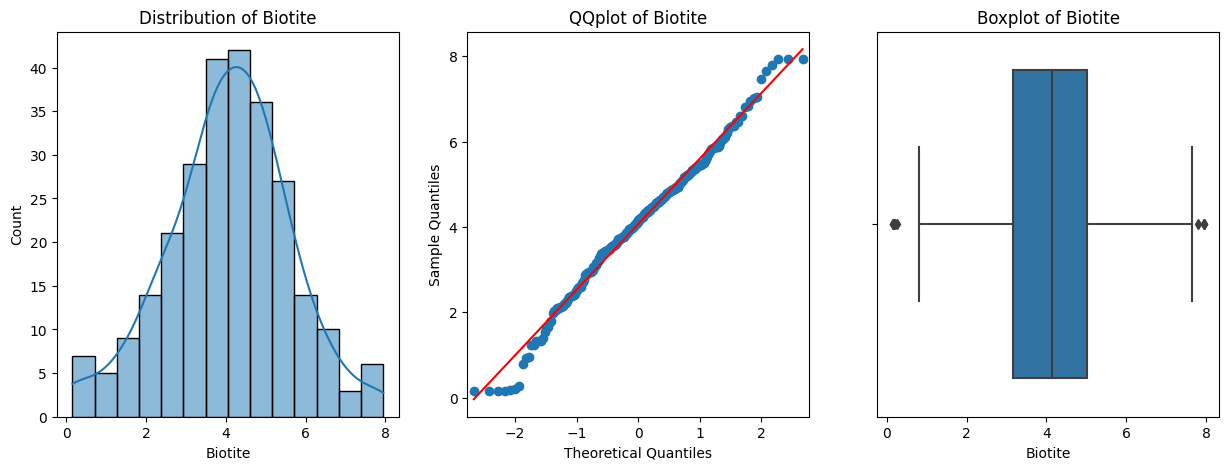

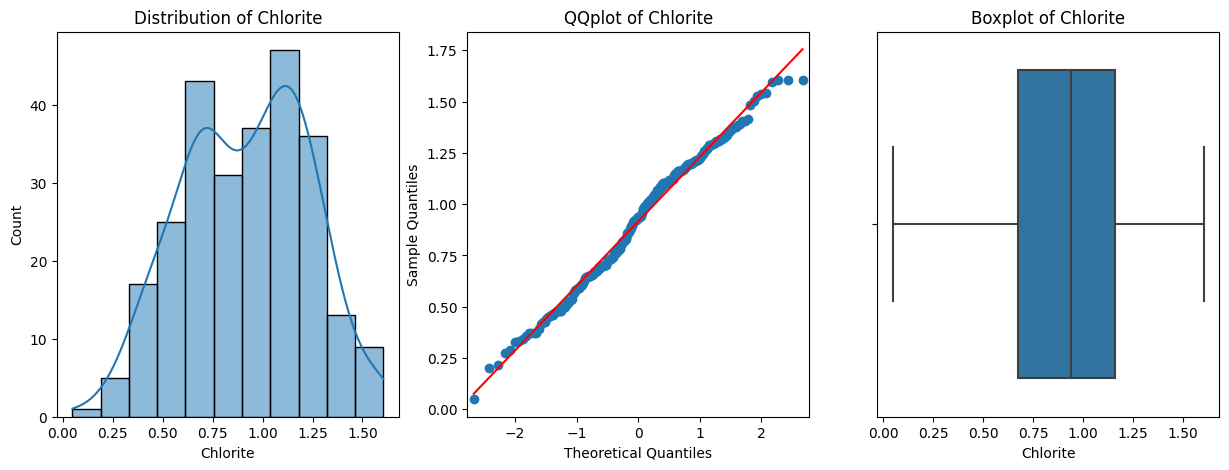

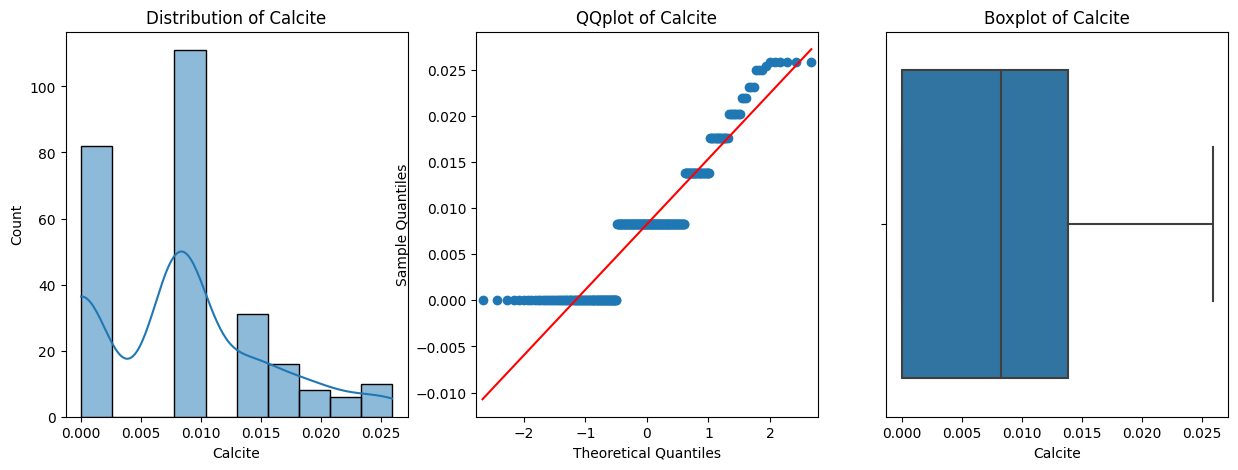

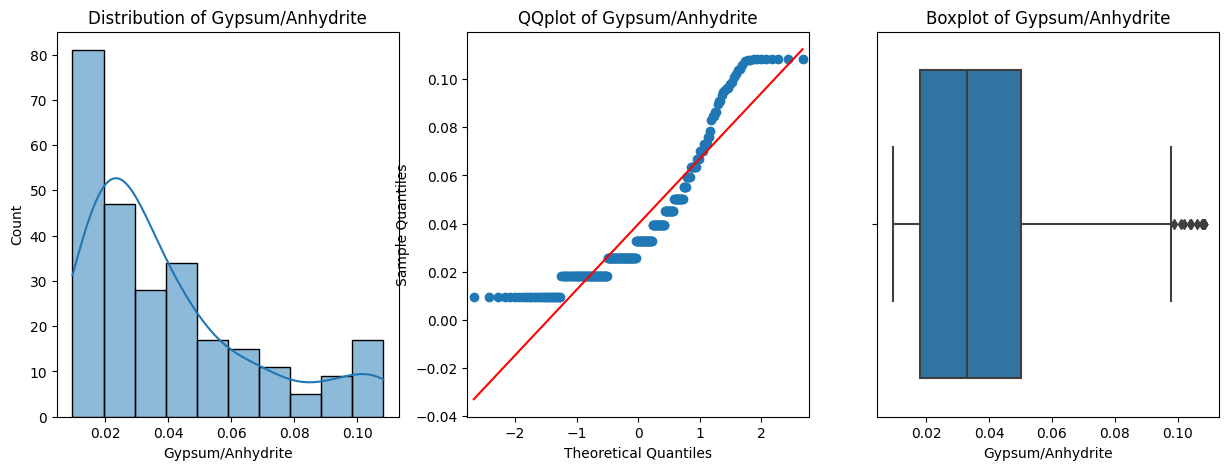

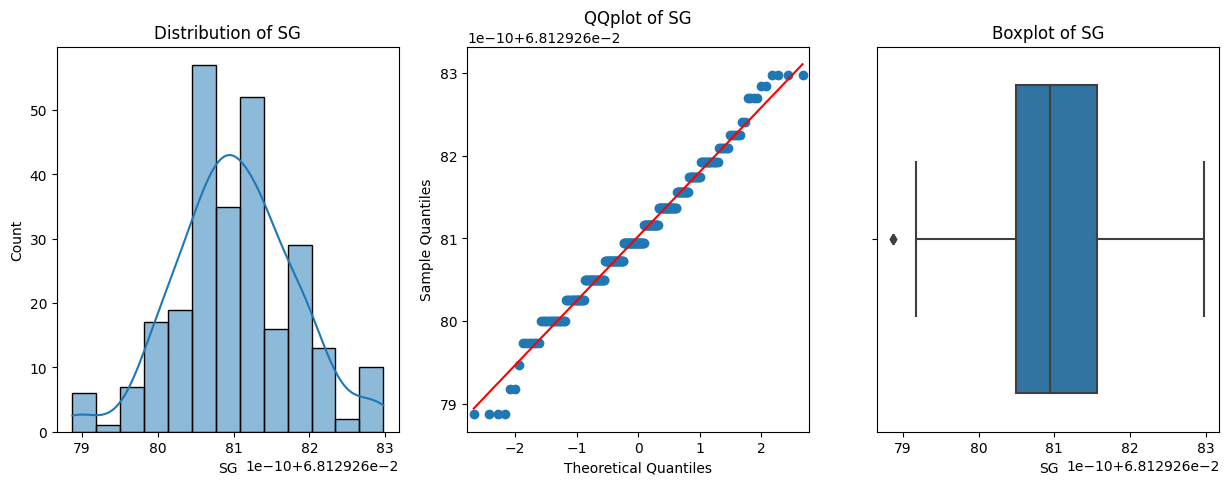

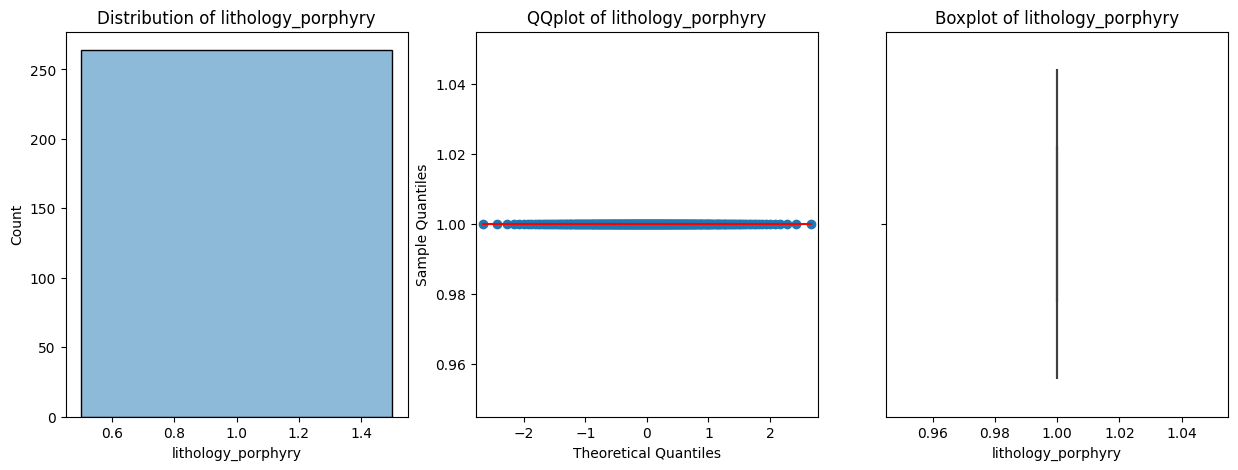

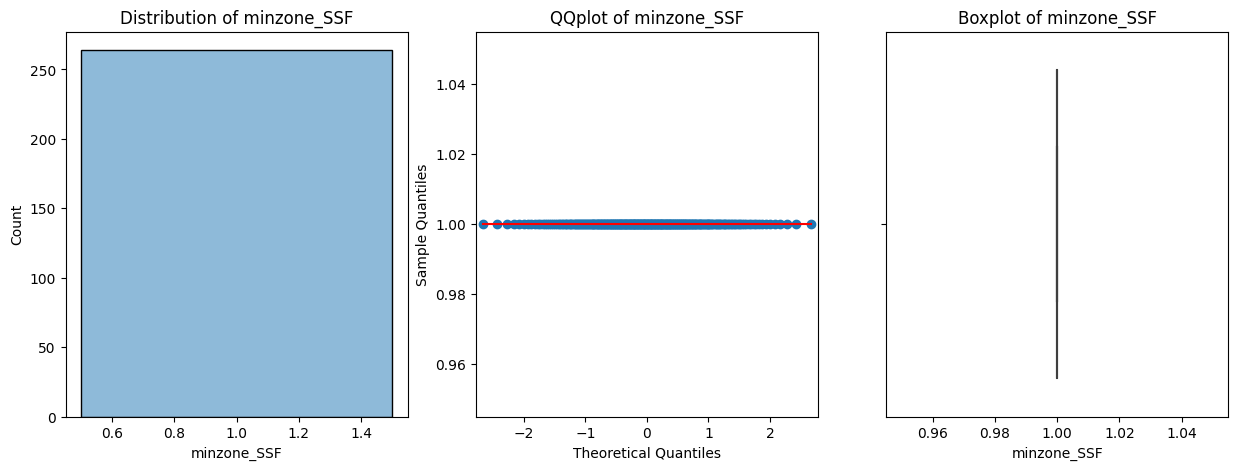

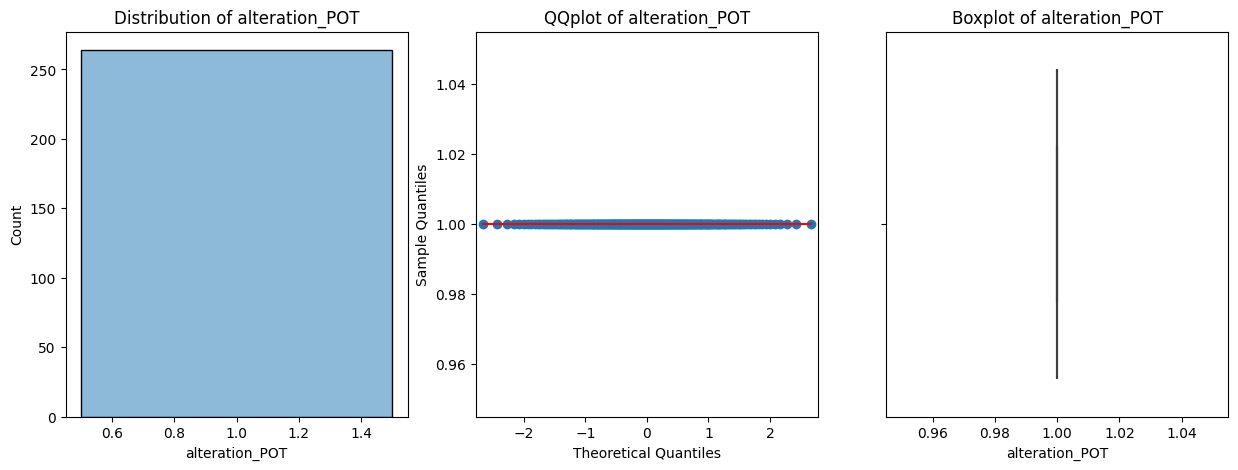

In [54]:
# Distribution of transformed variables
for feature in num_var_tf.columns:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(x = num_var_tf[feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"QQplot of {feature}")
    qqplot(num_var_tf[feature], line='s', ax = ax[1])
    
        
    ax[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(x = num_var_tf[feature], ax = ax[2])

## Feature scaling

In [55]:
X_train.round(2)

midx        midy     midz    East       North  elevation  \
356  274.37  1032322.96  1788.60  274.37  1032322.96    1788.60   
460  178.61  1417398.98  1820.00  178.61  1417398.98    1820.00   
327  281.82   973877.19  1812.28  281.82   973877.19    1812.28   
340  278.43   970389.20  1811.25  278.43   970389.20    1811.25   
326  281.82   973877.19  1812.28  281.82   973877.19    1812.28   
..      ...         ...      ...     ...         ...        ...   
368  237.22  1298527.32  1787.51  237.22  1298527.32    1787.51   
420  224.37  1238755.39  1732.67  224.37  1238755.39    1732.67   
237  294.93  1289514.38  1884.48  294.93  1289514.38    1884.48   
400  312.46  1170996.37  1901.34  312.46  1170996.37    1901.34   
202  293.19  1307792.69  1881.29  293.19  1307792.69    1881.29   

     Chalcocite-Digenite  Covellite  Chalcopyrite  Bornite  ...  \
356                 0.02       0.01          0.87     0.08  ...   
460                 0.37       0.02          0.55     0.06  ...   
327                -0.00      -0.00          0.79    -0.00  ...   
340                 0.01      -0.00          0.97     0.01  ...   
326                -0.00      -0.00          0.89     0.01  ...   
..                   ...        ...           ...      ...  ...   
368                 0.16       0.02          0.77     0.06  ...   
420                 0.27       0.01          1.06     0.18  ...   
237                 0.22       0.04          0.58     0.14  ...   
400                 0.31       0.04          0.49     0.06  ...   
202                 0.18       0.02          0.69     0.07  ...   

     Muscovite/Sericite  Clays  Biotite  Chlorite  Calcite  Gypsum/Anhydrite  \
356                2.18   0.32     4.45      1.12     0.01              0.05   
460                1.77   0.22     5.83      0.82     0.01              0.02   
327                2.88   0.23     2.91      1.05     0.03              0.11   
340                2.68   0.22     3.47      1.07    -0.00              0.02   
326                2.91   0.22     2.58      1.00     0.03              0.11   
..                  ...    ...      ...       ...      ...               ...   
368                1.79   0.56     3.72      0.77     0.01              0.03   
420                2.16   0.50     4.46      0.63     0.01              0.10   
237                1.53   0.32     5.88      1.23    -0.00              0.05   
400                3.42   0.38     0.80      1.60     0.01              0.03   
202                1.76   0.67     2.30      1.32    -0.00              0.01   

       SG  lithology_porphyry  minzone_SSF  alteration_POT  
356  0.07                   1            1               1  
460  0.07                   1            1               1  
327  0.07                   1            1               1  
340  0.07                   1            1               1  
326  0.07                   1            1               1  
..    ...                 ...          ...             ...  
368  0.07                   1            1               1  
420  0.07                   1            1               1  
237  0.07                   1            1               1  
400  0.07                   1            1               1  
202  0.07                   1            1               1  

[264 rows x 26 columns]

**Comment:**
    numerical variables with different scale. This could lead to some problems, in particular for linear regression models. Scaling will be required.

**Comment:** enargite and sphalerite are removed from outlier removal
for being constant or quasi-constant variables.

### Feature scaling

**Comment:** Feature scaling is conducting with scikit-learn. This returns an array, then it is necessary to change the transformed database into a Pandas dataframe.

In [56]:
# Set up (instantiate) the scaler
scaler = RobustScaler()

In [57]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

RobustScaler()

In [58]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Transforming the returned NumPy arrays into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [60]:
X_train_scaled.head()

midx      midy      midz      East     North  elevation  \
0  0.333295 -1.508657 -0.270742  0.333295 -1.508657  -0.270742   
1 -0.788034  1.284122  0.108087 -0.788034  1.284122   0.108087   
2  0.420556 -1.932537  0.015007  0.420556 -1.932537   0.015007   
3  0.380847 -1.957834  0.002497  0.380847 -1.957834   0.002497   
4  0.420556 -1.932537  0.015007  0.420556 -1.932537   0.015007   

   Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
0            -1.076174  -0.667604      0.945244  0.068149  ...   
1             0.883907  -0.308508     -0.099888 -0.294805  ...   
2            -1.185772  -1.086214      0.709209 -1.102340  ...   
3            -1.130275  -1.086214      1.271708 -0.967533  ...   
4            -1.185772  -1.086214      1.033724 -0.967533  ...   

   Muscovite/Sericite     Clays   Biotite  Chlorite   Calcite  \
0            0.054146 -0.487666  0.167533  0.381942  0.000000   
1           -0.334568 -0.965949  0.909303 -0.243119  0.000000   
2            0.723156 -0.906631 -0.668848  0.237790  1.273561   
3            0.529191 -0.936073 -0.364115  0.270553 -0.596849   
4            0.751507 -0.965949 -0.843345  0.119593  1.273157   

   Gypsum/Anhydrite        SG  lithology_porphyry  minzone_SSF  alteration_POT  
0          0.540448  0.573506                 0.0          0.0             0.0  
1         -0.459552 -0.892374                 0.0          0.0             0.0  
2          2.340318  1.783528                 0.0          0.0             0.0  
3         -0.459552  0.199591                 0.0          0.0             0.0  
4          2.340318  1.654020                 0.0          0.0             0.0  

[5 rows x 26 columns]

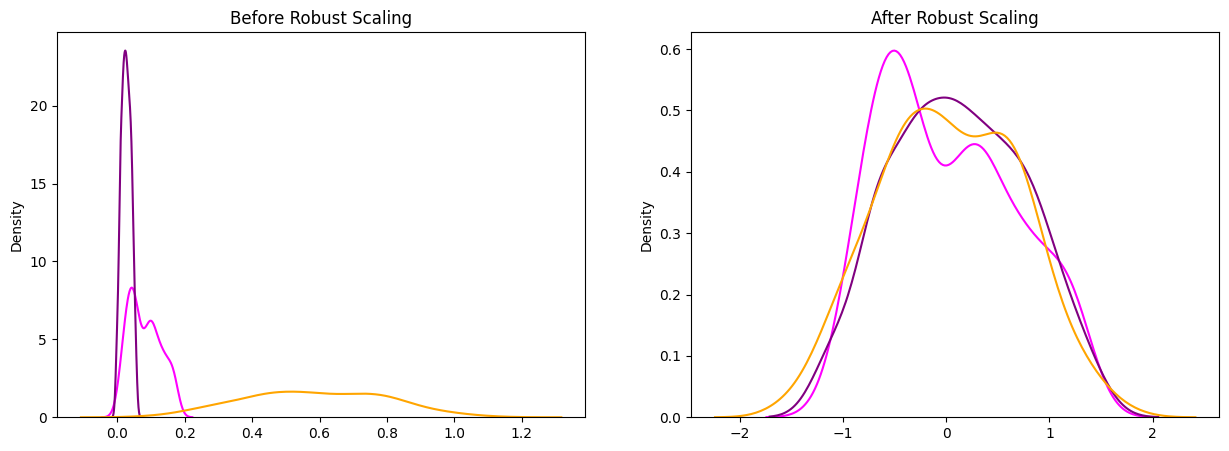

In [61]:
# Comparing variable distributions before and after scaling

fig, ax = plt.subplots(1,2, figsize = (15,5))

# before scaling
ax[0].set_title('Before Robust Scaling')
sns.kdeplot(data=X_train['Bornite'], ax=ax[0], color='magenta')
sns.kdeplot(data=X_train['Covellite'], ax=ax[0], color='purple')
sns.kdeplot(data=X_train['Chalcopyrite'], ax=ax[0], color='orange')

# after scaling
ax[1].set_title('After Robust Scaling')
sns.kdeplot(data=X_train_scaled['Bornite'], ax=ax[1], color='magenta')
sns.kdeplot(data=X_train_scaled['Covellite'], ax=ax[1], color='purple')
sns.kdeplot(data=X_train_scaled['Chalcopyrite'], ax=ax[1], color='orange')

ax[0].set(xlabel=None)
ax[1].set(xlabel=None)

plt.show()

In [62]:
# Finally, changing the working database
X_train = X_train_scaled
X_test = X_test_scaled

In [63]:
X_train

midx      midy      midz      East     North  elevation  \
0    0.333295 -1.508657 -0.270742  0.333295 -1.508657  -0.270742   
1   -0.788034  1.284122  0.108087 -0.788034  1.284122   0.108087   
2    0.420556 -1.932537  0.015007  0.420556 -1.932537   0.015007   
3    0.380847 -1.957834  0.002497  0.380847 -1.957834   0.002497   
4    0.420556 -1.932537  0.015007  0.420556 -1.932537   0.015007   
..        ...       ...       ...       ...       ...        ...   
259 -0.101764  0.422000 -0.283870 -0.101764  0.422000  -0.283870   
260 -0.252165 -0.011498 -0.945383 -0.252165 -0.011498  -0.945383   
261  0.574065  0.356633  0.885855  0.574065  0.356633   0.885855   
262  0.779230 -0.502923  1.089231  0.779230 -0.502923   1.089231   
263  0.553585  0.489198  0.847422  0.553585  0.489198   0.847422   

     Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
0              -1.076174  -0.667604      0.945244  0.068149  ...   
1               0.883907  -0.308508     -0.099888 -0.294805  ...   
2              -1.185772  -1.086214      0.709209 -1.102340  ...   
3              -1.130275  -1.086214      1.271708 -0.967533  ...   
4              -1.185772  -1.086214      1.033724 -0.967533  ...   
..                   ...        ...           ...       ...  ...   
259            -0.259839   0.000000      0.633830 -0.317202  ...   
260             0.306691  -0.667604      1.559598  1.349344  ...   
261             0.051195   0.862010      0.000000  0.793155  ...   
262             0.576516   0.862010     -0.275332 -0.317202  ...   
263            -0.159738   0.000000      0.350774 -0.149055  ...   

     Muscovite/Sericite     Clays   Biotite  Chlorite   Calcite  \
0              0.054146 -0.487666  0.167533  0.381942  0.000000   
1             -0.334568 -0.965949  0.909303 -0.243119  0.000000   
2              0.723156 -0.906631 -0.668848  0.237790  1.273561   
3              0.529191 -0.936073 -0.364115  0.270553 -0.596849   
4              0.751507 -0.965949 -0.843345  0.119593  1.273157   
..                  ...       ...       ...       ...       ...   
259           -0.311271  0.634316 -0.228415 -0.345491  0.000000   
260            0.040041  0.359095  0.171031 -0.633906  0.000000   
261           -0.557110 -0.487666  0.938856  0.605154 -0.596849   
262            1.228659 -0.186388 -1.807624  1.364941  0.403151   
263           -0.341001  1.178704 -0.994059  0.790438 -0.596849   

     Gypsum/Anhydrite        SG  lithology_porphyry  minzone_SSF  \
0            0.540448  0.573506                 0.0          0.0   
1           -0.459552 -0.892374                 0.0          0.0   
2            2.340318  1.783528                 0.0          0.0   
3           -0.459552  0.199591                 0.0          0.0   
4            2.340318  1.654020                 0.0          0.0   
..                ...       ...                 ...          ...   
259         -0.218371  1.654020                 0.0          0.0   
260          2.199648  0.199591                 0.0          0.0   
261          0.540448 -0.654277                 0.0          0.0   
262          0.000000 -0.426494                 0.0          0.0   
263         -0.726184  0.916230                 0.0          0.0   

     alteration_POT  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
259             0.0  
260             0.0  
261             0.0  
262             0.0  
263             0.0  

[264 rows x 26 columns]

# Feature selection

## Removing constant, quasi-constant and duplicated features

In [64]:
pipe = Pipeline([
    ('Constant', DropConstantFeatures(tol=0.99)),
    ('Duplicated', DropDuplicateFeatures())
])

In [65]:
pipe.fit(X_train)

Pipeline(steps=[('Constant', DropConstantFeatures(tol=0.99)),
                ('Duplicated', DropDuplicateFeatures())])

In [66]:
X_train.shape

(264, 26)

In [67]:
X_train.columns

Index(['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG', 'lithology_porphyry', 'minzone_SSF',
       'alteration_POT'],
      dtype='object')

In [68]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [69]:
X_train.shape

(264, 18)

In [70]:
X_train.columns

Index(['midx', 'midy', 'midz', 'Chalcocite-Digenite', 'Covellite',
       'Chalcopyrite', 'Bornite', 'Pyrite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG'],
      dtype='object')

## Recursive Feature Elimination (SFE)

In [71]:
# Building initial model using all the features
model = RandomForestRegressor(n_estimators=100,
                          max_depth=3,
                          random_state=1,
                          n_jobs=4)

In [72]:
# Setup the RFE selector
sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'r2', # metric for evaluating
    threshold = 0.001, #  maximum performance drop allowed to remove a feature
    cv=3, # cross-validation
)

In [73]:
y_train = pd.DataFrame(y_train, columns=['Ai'])

In [74]:
# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RecursiveFeatureElimination(estimator=RandomForestRegressor(max_depth=3,
                                                            n_jobs=4,
                                                            random_state=1),
                            scoring='r2', threshold=0.001)

In [75]:
# performance of model trained using all features
sel.initial_model_performance_

0.4790388022043133

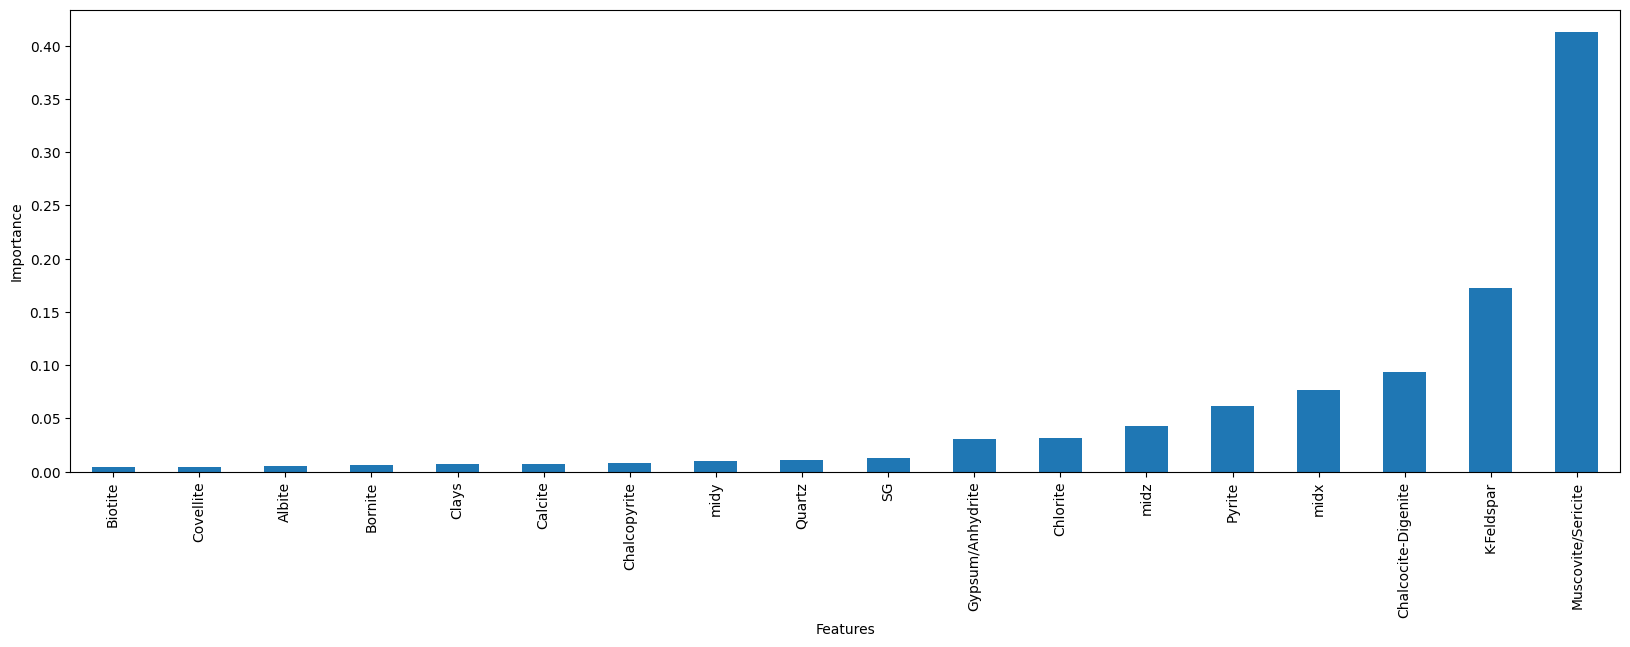

In [76]:
# importance of all features based of initial model
sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [77]:
# Number of features that will be removed
len(sel.features_to_drop_)

8

In [78]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((264, 10), (66, 10))

In [79]:
# Performance of the model built on the selected features

# fit the model with the selected features
model.fit(X_train, y_train)

# make predictions
y_pred_test = model.predict(X_test)

# calculate r2
r2_final = r2_score(y_test, y_pred_test)


print("R2 test sample:", round((r2_final),3))

R2 test sample: 0.571


C:\Users\Asus\AppData\Local\Temp\ipykernel_8\3778660791.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


**Comment**: The model built with 7 features shows similar or slightly better performance than the model estimated with the total 18 features.

In [80]:
print("Model results:")
print("")

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("RMSE test sample:", round(np.sqrt(mse_test),3))
print("R2 test sample:", round((r2_test),3))

Model results:

RMSE test sample: 0.029
R2 test sample: 0.571


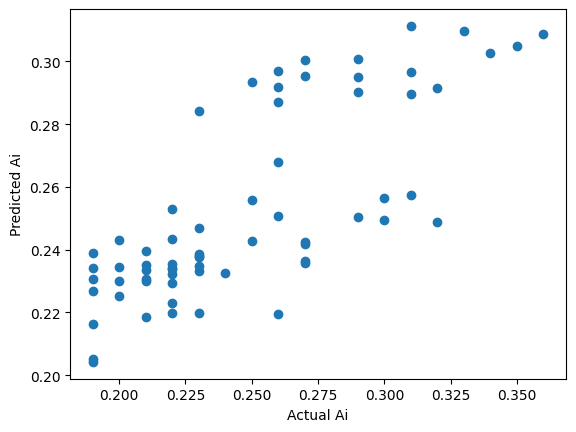

In [81]:
# Predicted vs actual value visualization
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Ai')
plt.ylabel('Predicted Ai');

In [82]:
X_train.columns

Index(['midx', 'midy', 'midz', 'Chalcocite-Digenite', 'Chalcopyrite',
       'Bornite', 'K-Feldspar', 'Muscovite/Sericite', 'Clays', 'Calcite'],
      dtype='object')

# Random Forest regression model

In [83]:
# GridsearchCV function will be used to conduct the hyperparameter tuning

# Instantiate the grid search model
rf = RandomForestRegressor(random_state=1)

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'max_features': [3, 4, 5, 6, 7],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [3, 4, 5, 6],
    'n_estimators': [20, 30, 40, 50]
}

grid = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, verbose=1)

In [84]:
4 * 5 * 4 * 4 * 4

1280

Note: There are 4 * 5 * 4 * 4 * 4 = 1,280 combinations of parameter settings.

In [ ]:
# Fitting the grid
%timeit
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

In [ ]:
# Printing the best parameters
print(f"The best parameters are {grid.best_params_} with a score of {grid.best_score_:.3f}")

In [ ]:
# Instantiating the random forest model
rf_model = RandomForestRegressor(max_depth=20, max_features=6, min_samples_leaf=2,
                                 min_samples_split=5, n_estimators=50, random_state=1)

In [ ]:
# Fitting the model
rf_model.fit(X_train, y_train)

In [ ]:
# Prediction of the Ai in the test dataset
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Predicted vs actual value visualization
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Ai')
plt.ylabel('Predicted Ai');

In [ ]:
print("Model results:")
print("")

#mse_train = mean_squared_error(y_train, y_train_pred)
#r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_pred_rf)
r2_test = r2_score(y_test, y_pred_rf)

#print("RMSE training sample:", round(np.sqrt(mse_train),3))
#print("R2 training sample:", round((r2_train),3))
#print("")
print("RMSE test:", round(np.sqrt(mse_test),3))
print("R2 test:", round((r2_test),3))

In [ ]:
###############################     END OF DATA PREPARATION     #############################